In [138]:
#import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [139]:
data = pd.read_csv('Relaince_stock.csv')
df = data.copy() #making a copy of the original dataset so that you wont modify the original

In [140]:
df.head() #first 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [141]:
df.tail() #bottom 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
5750,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
5751,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
5752,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
5753,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0
5754,2022-12-30,2545.100098,2577.000000,2541.100098,2547.199951,2547.199951,3364092.0


In [142]:
df.shape

(5755, 7)

In [143]:
#check for null values
df.isnull().sum()

Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [144]:
#drop null values if any
df.dropna(inplace=True)
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [145]:
#check for duplicates 
df.duplicated().sum()

0

In [146]:
#info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5745 entries, 0 to 5754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5745 non-null   object 
 1   Open       5745 non-null   float64
 2   High       5745 non-null   float64
 3   Low        5745 non-null   float64
 4   Close      5745 non-null   float64
 5   Adj Close  5745 non-null   float64
 6   Volume     5745 non-null   float64
dtypes: float64(6), object(1)
memory usage: 359.1+ KB


In [147]:
#convert the Date datatype from object to date format
df['Date'] = pd.to_datetime(df.Date)

In [148]:
print("Date datatype: ", df.Date.dtype)

Date datatype:  datetime64[ns]


In [149]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [150]:
#sort dataset by date values
df.sort_values(by="Date", inplace = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [151]:
df.shape

(5745, 7)

In [152]:
#Get the duration of the dataset 
print("Starting Date: ",df.iloc[0][0])
print("Ending Date: ",df.iloc[-1][0])
print("Duration: ",df.iloc[-1][0]-df.iloc[0][0])

Starting Date:  2000-01-03 00:00:00
Ending Date:  2022-12-30 00:00:00
Duration:  8397 days 00:00:00


In [153]:
#making a copy of new dataframe before setting the index
df1 = df.copy()

In [154]:
#set the date column as index 
df.set_index(df.Date,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [155]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0


In [156]:
#use describe() function for statistical insights
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5.745000e+03
mean,638.461095,646.283828,630.097175,637.879417,615.592615,1.681692e+07
std,679.735286,687.198000,671.907024,679.242266,682.151473,1.809928e+07
min,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,101.221848,103.666519,99.837044,101.291473,89.115646,6.334809e+06
50%,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07
75%,681.056763,690.801880,668.661743,675.992249,638.090271,2.036854e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,2.918015e+08


## EDA

## Monthwise comparision between Stock actual, open and close price

In [157]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')
monthwise

,Open,Close
Date,,
March,572.426672,572.765310
February,582.816803,582.770337
January,588.453414,587.030394
April,599.102426,599.846317
May,605.125390,603.825314
June,641.305865,640.804172
July,643.367897,642.744843
August,653.832369,653.516854
October,686.191762,684.980266


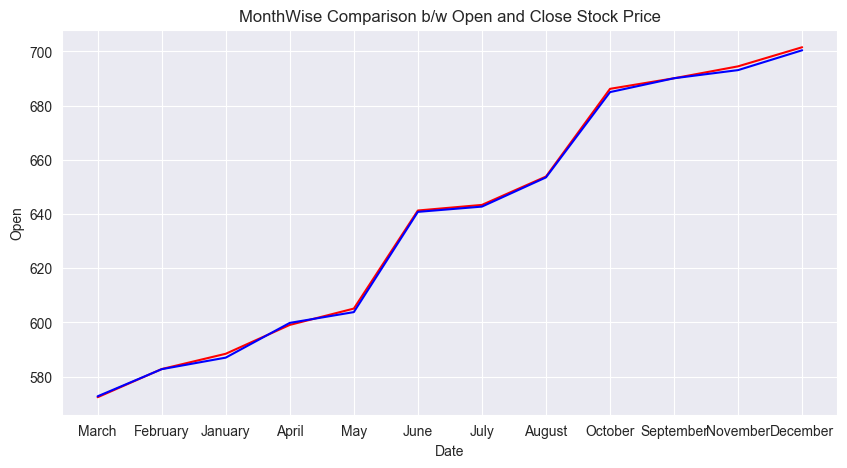

In [158]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthwise.index, y=monthwise["Open"],color='red')
sns.lineplot(x=monthwise.index, y=monthwise["Close"],color='blue')
plt.title('MonthWise Comparison b/w Open and Close Stock Price')
plt.show()

## MonthWise Comparison Between High and Low Stock Price

In [159]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))[['High','Low']].mean().sort_values(by='Low')
monthwise

,High,Low
Date,,
March,581.215380,564.053766
February,590.131139,575.556879
January,595.262685,580.171114
April,607.819274,592.032875
May,612.846916,596.615814
June,649.519068,632.874322
July,650.693654,635.191326
August,661.232069,645.982572
October,694.903436,675.968884


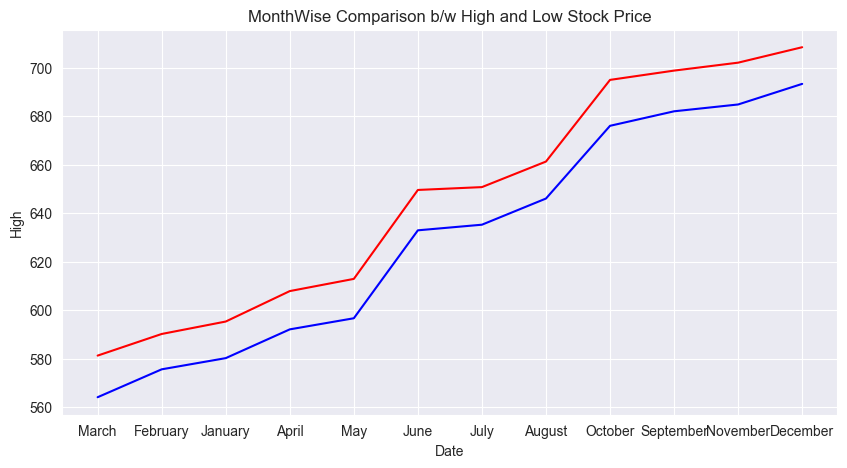

In [160]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthwise.index, y=monthwise["High"],color='red')
sns.lineplot(x=monthwise.index, y=monthwise["Low"],color='blue')
plt.title('MonthWise Comparison b/w High and Low Stock Price')
plt.show()

### Visualizations

In [161]:
#visualize the each column
sns.set_style('darkgrid')

### Line plots

Text(0.5, 1.0, 'Date vs Close')

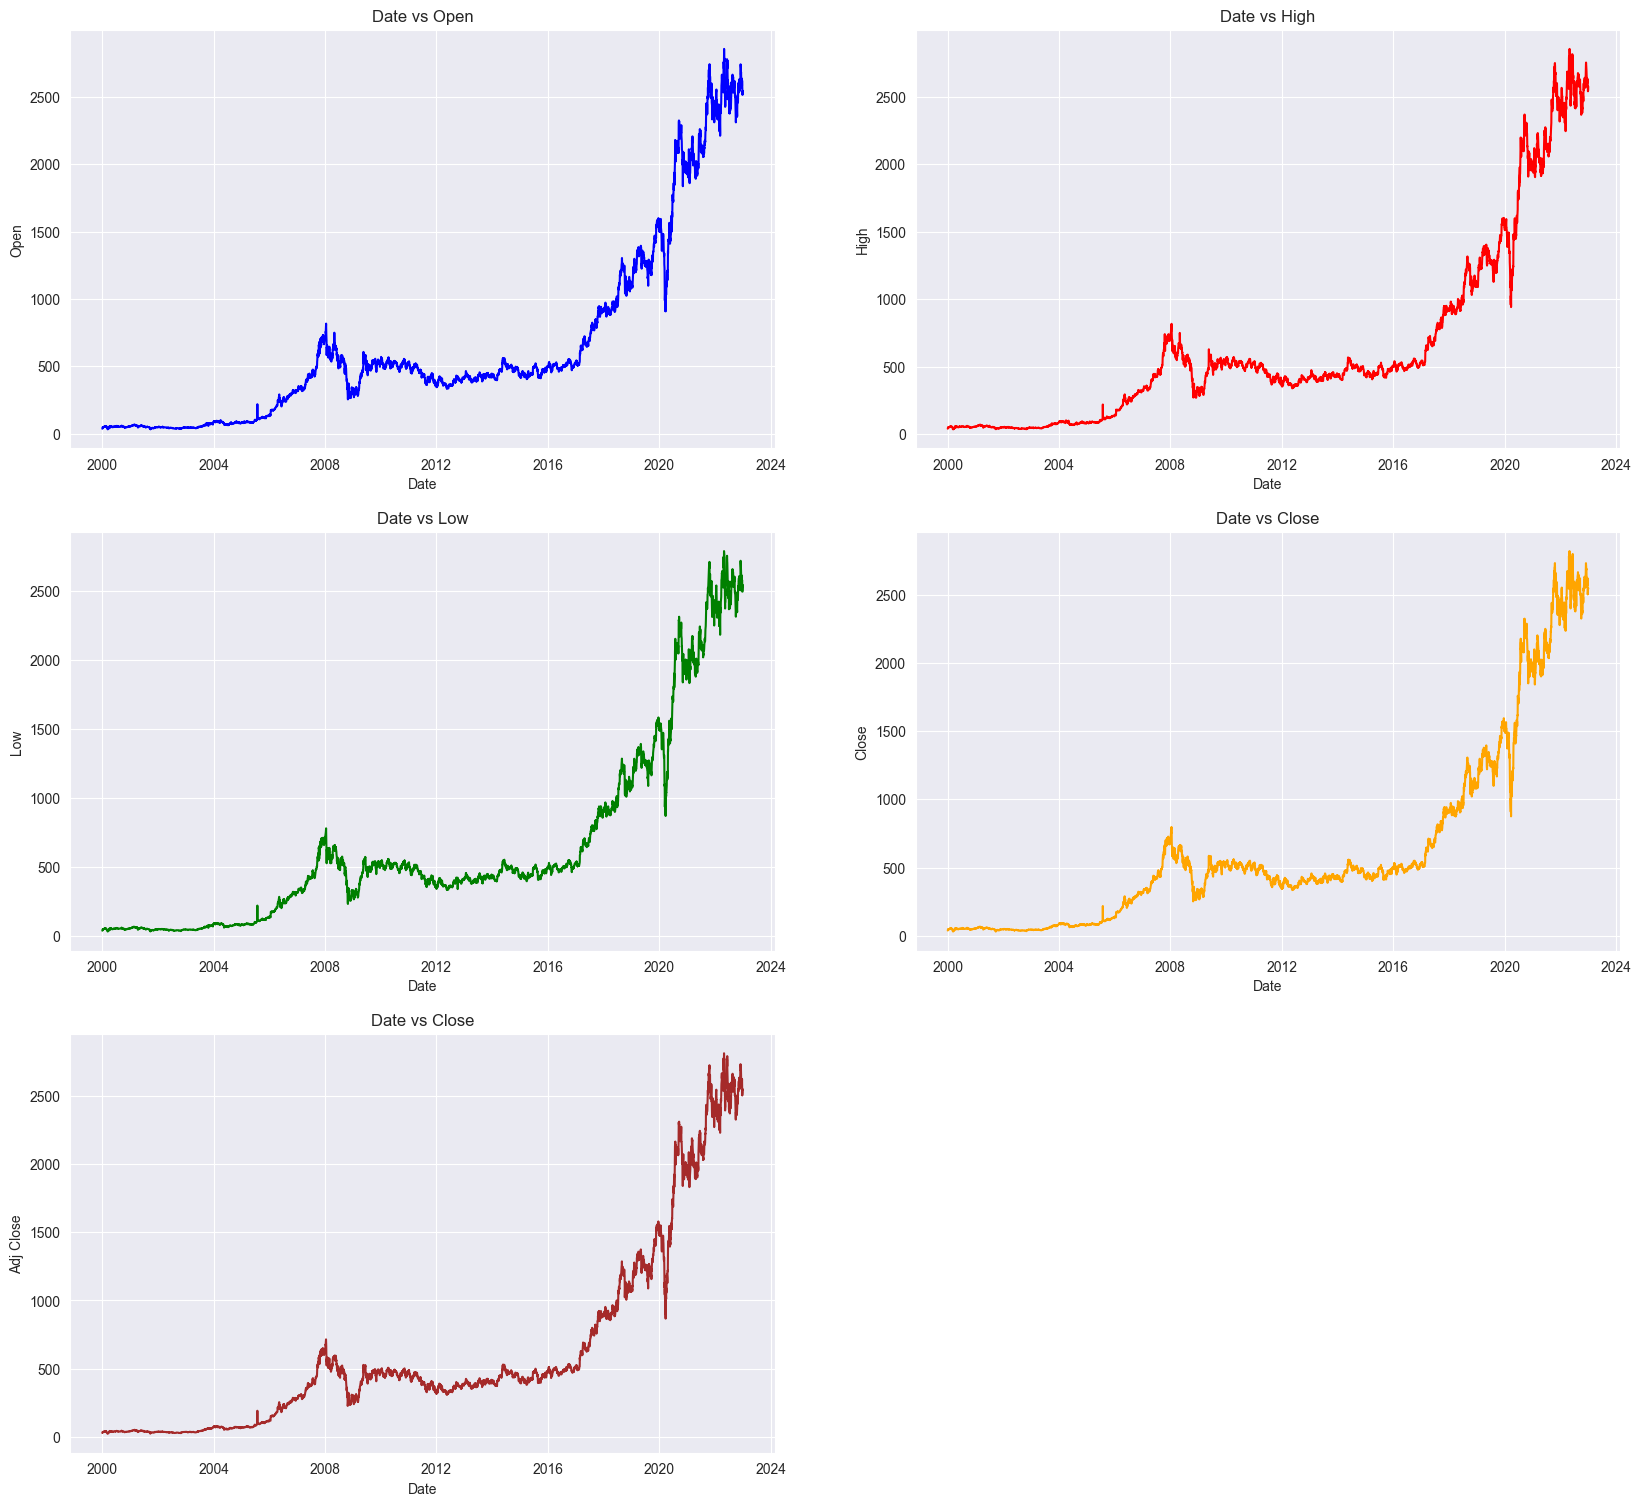

In [162]:
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.plot(df['Open'],color="Blue")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Date vs Open")
#plot2
plt.subplot(4,2,2)
plt.plot(df['High'],color="Red")
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Date vs High")
#plot3
plt.subplot(4,2,3)
plt.plot(df['Low'],color="Green")
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Date vs Low")
#plot4
plt.subplot(4,2,4)
plt.plot(df['Close'],color="Orange")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Date vs Close")
#plot5
plt.subplot(4,2,5)
plt.plot(df['Adj Close'],color="Brown")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Date vs Close")

### Distribution Plots

Text(0.5, 1.0, 'Distplot-Adj Close')

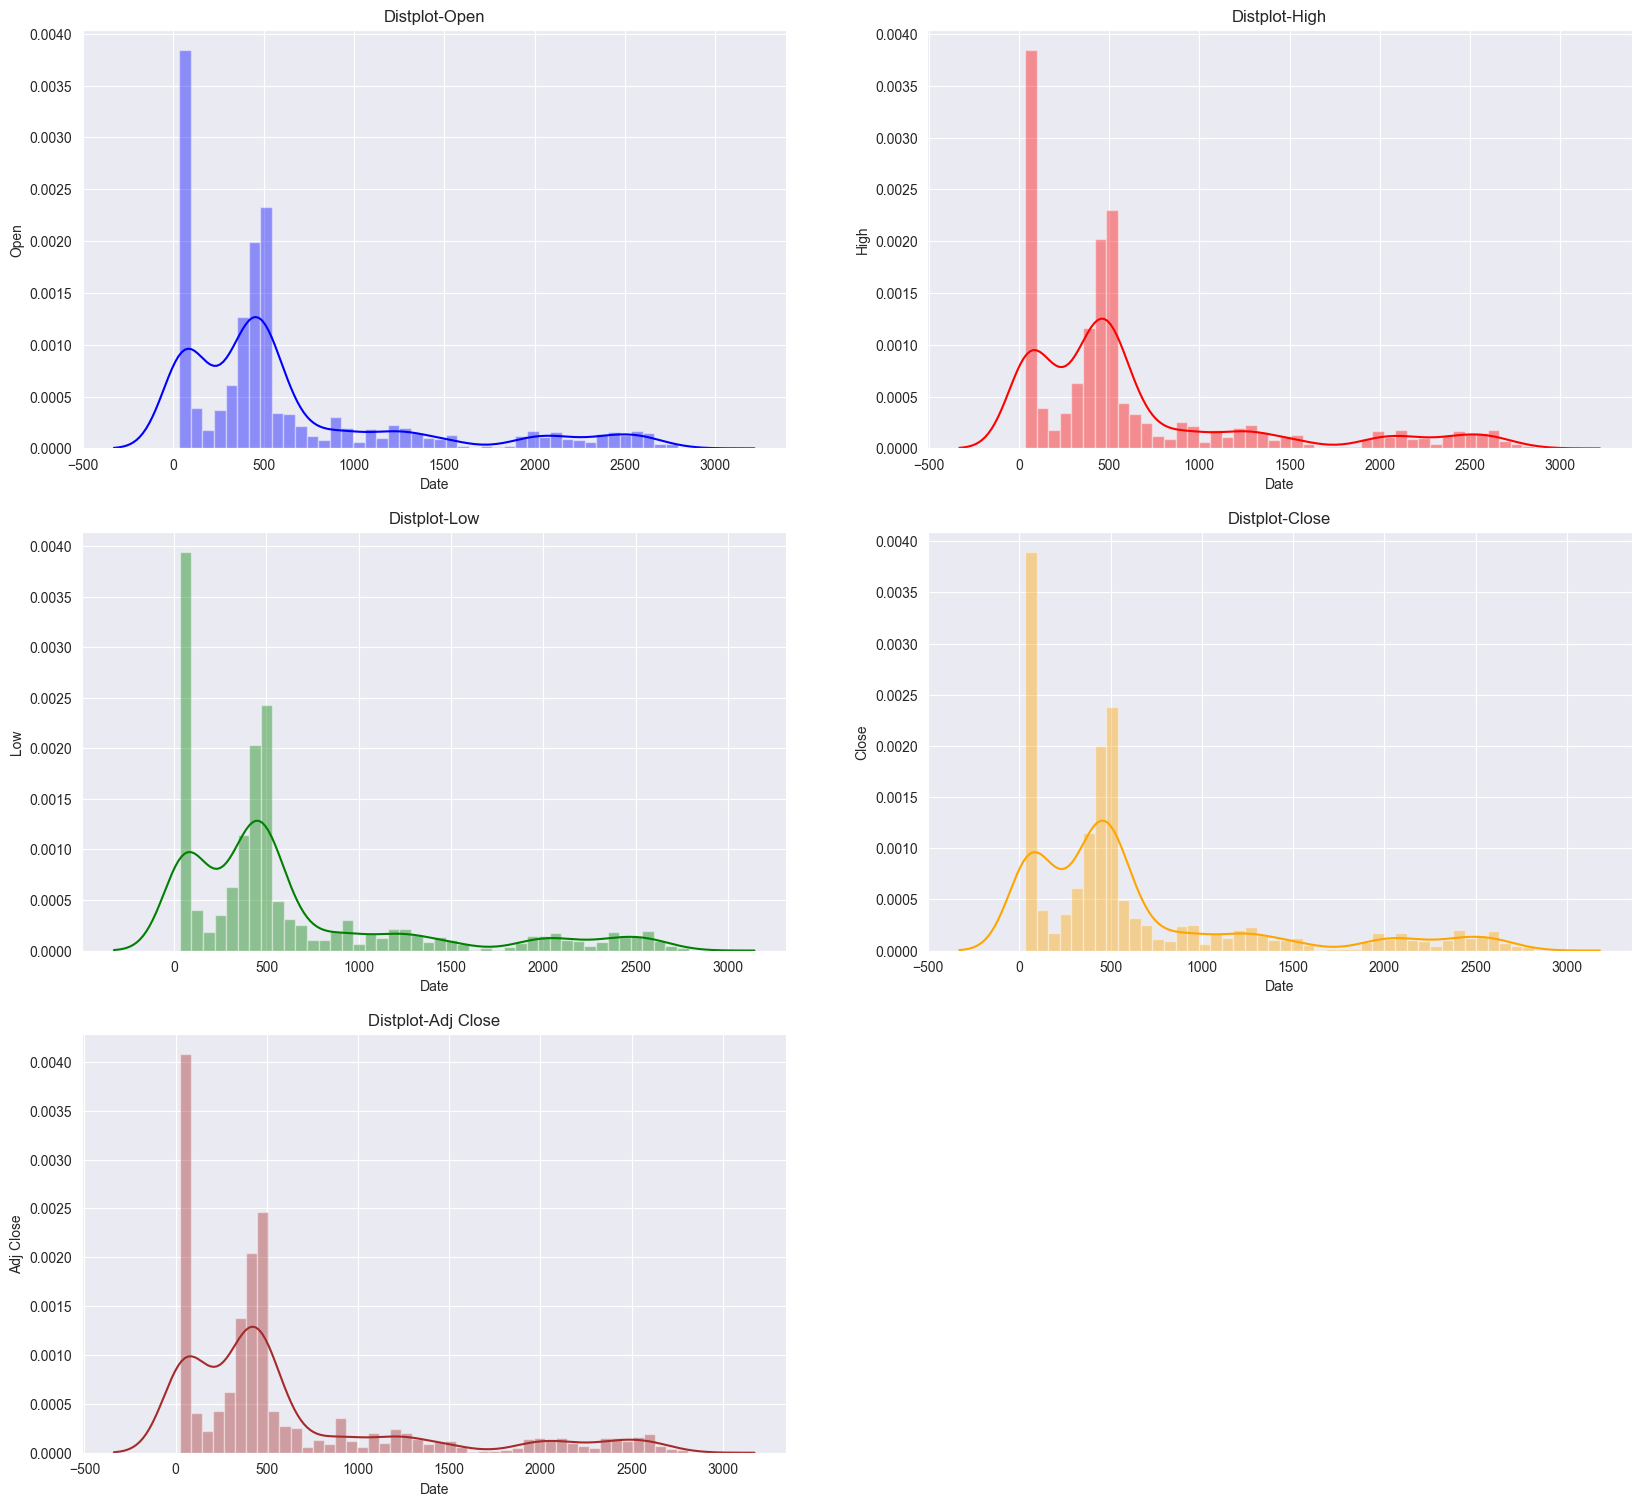

In [163]:
#creating Distribution Plot
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.distplot(df['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Distplot-Open")
#plot2
plt.subplot(4,2,2)
sns.distplot(df['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Distplot-High")
#plot3
plt.subplot(4,2,3)
sns.distplot(df['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Distplot-Low")
#plot4
plt.subplot(4,2,4)
sns.distplot(df['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Distplot-Close")
#plot5
plt.subplot(4,2,5)
sns.distplot(df['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Distplot-Adj Close")

### Boxplots

Text(0.5, 1.0, 'Boxplot-Adj Close')

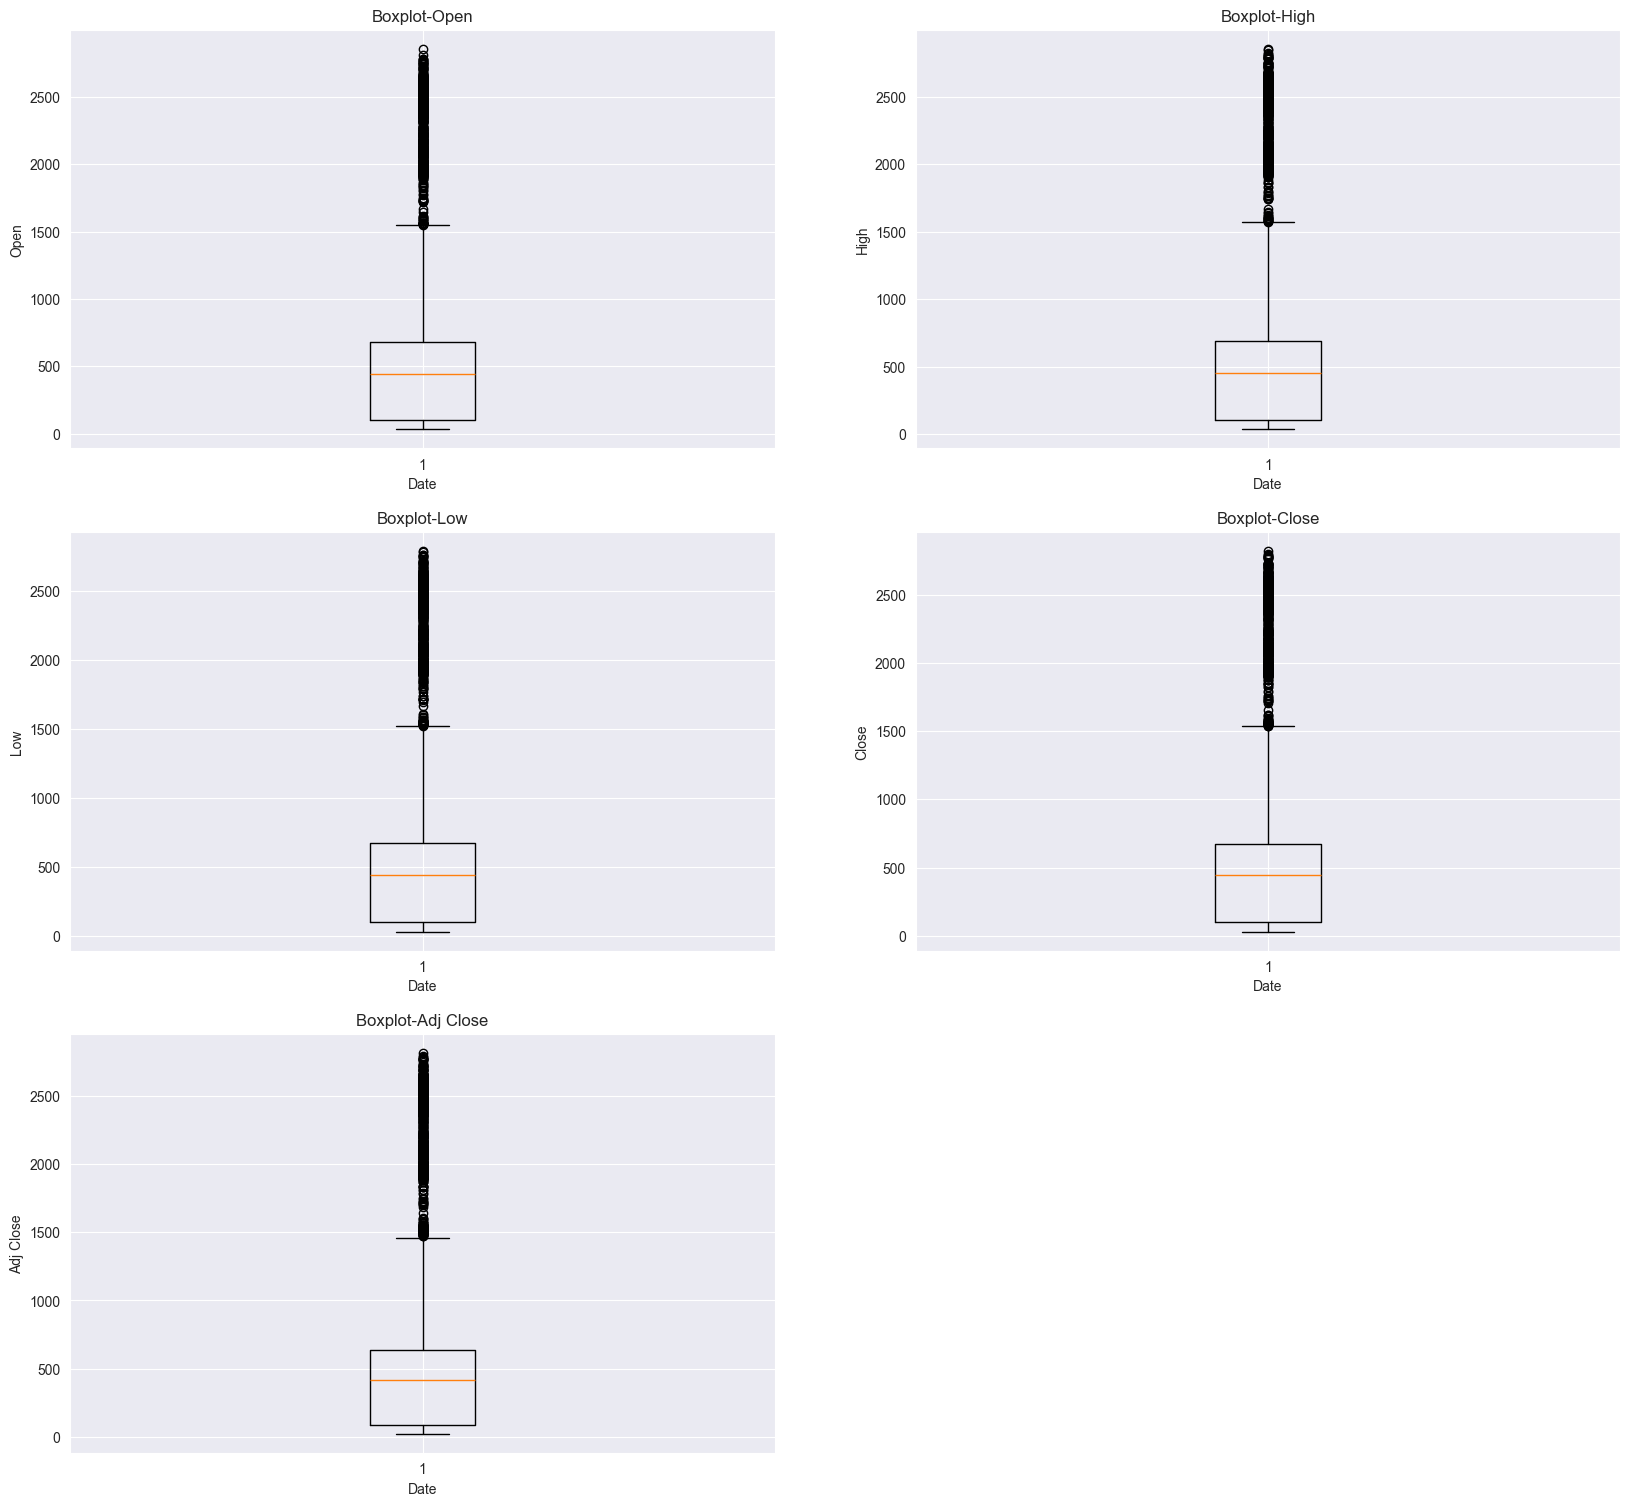

In [164]:
#creating boxplots
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.boxplot(df['Open'])
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
plt.boxplot(df['High'])
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
plt.boxplot(df['Low'])
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
plt.boxplot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
plt.boxplot(df['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

In [165]:
def cap_outliers(df, multiplier=1.5):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to modify

    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        mean = df[col].mean()

        # Cap outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [166]:
df_new =cap_outliers(df)
df_new.shape

(4406, 6)

### Boxplots after capping outliers

Text(0.5, 1.0, 'Boxplot-Adj Close')

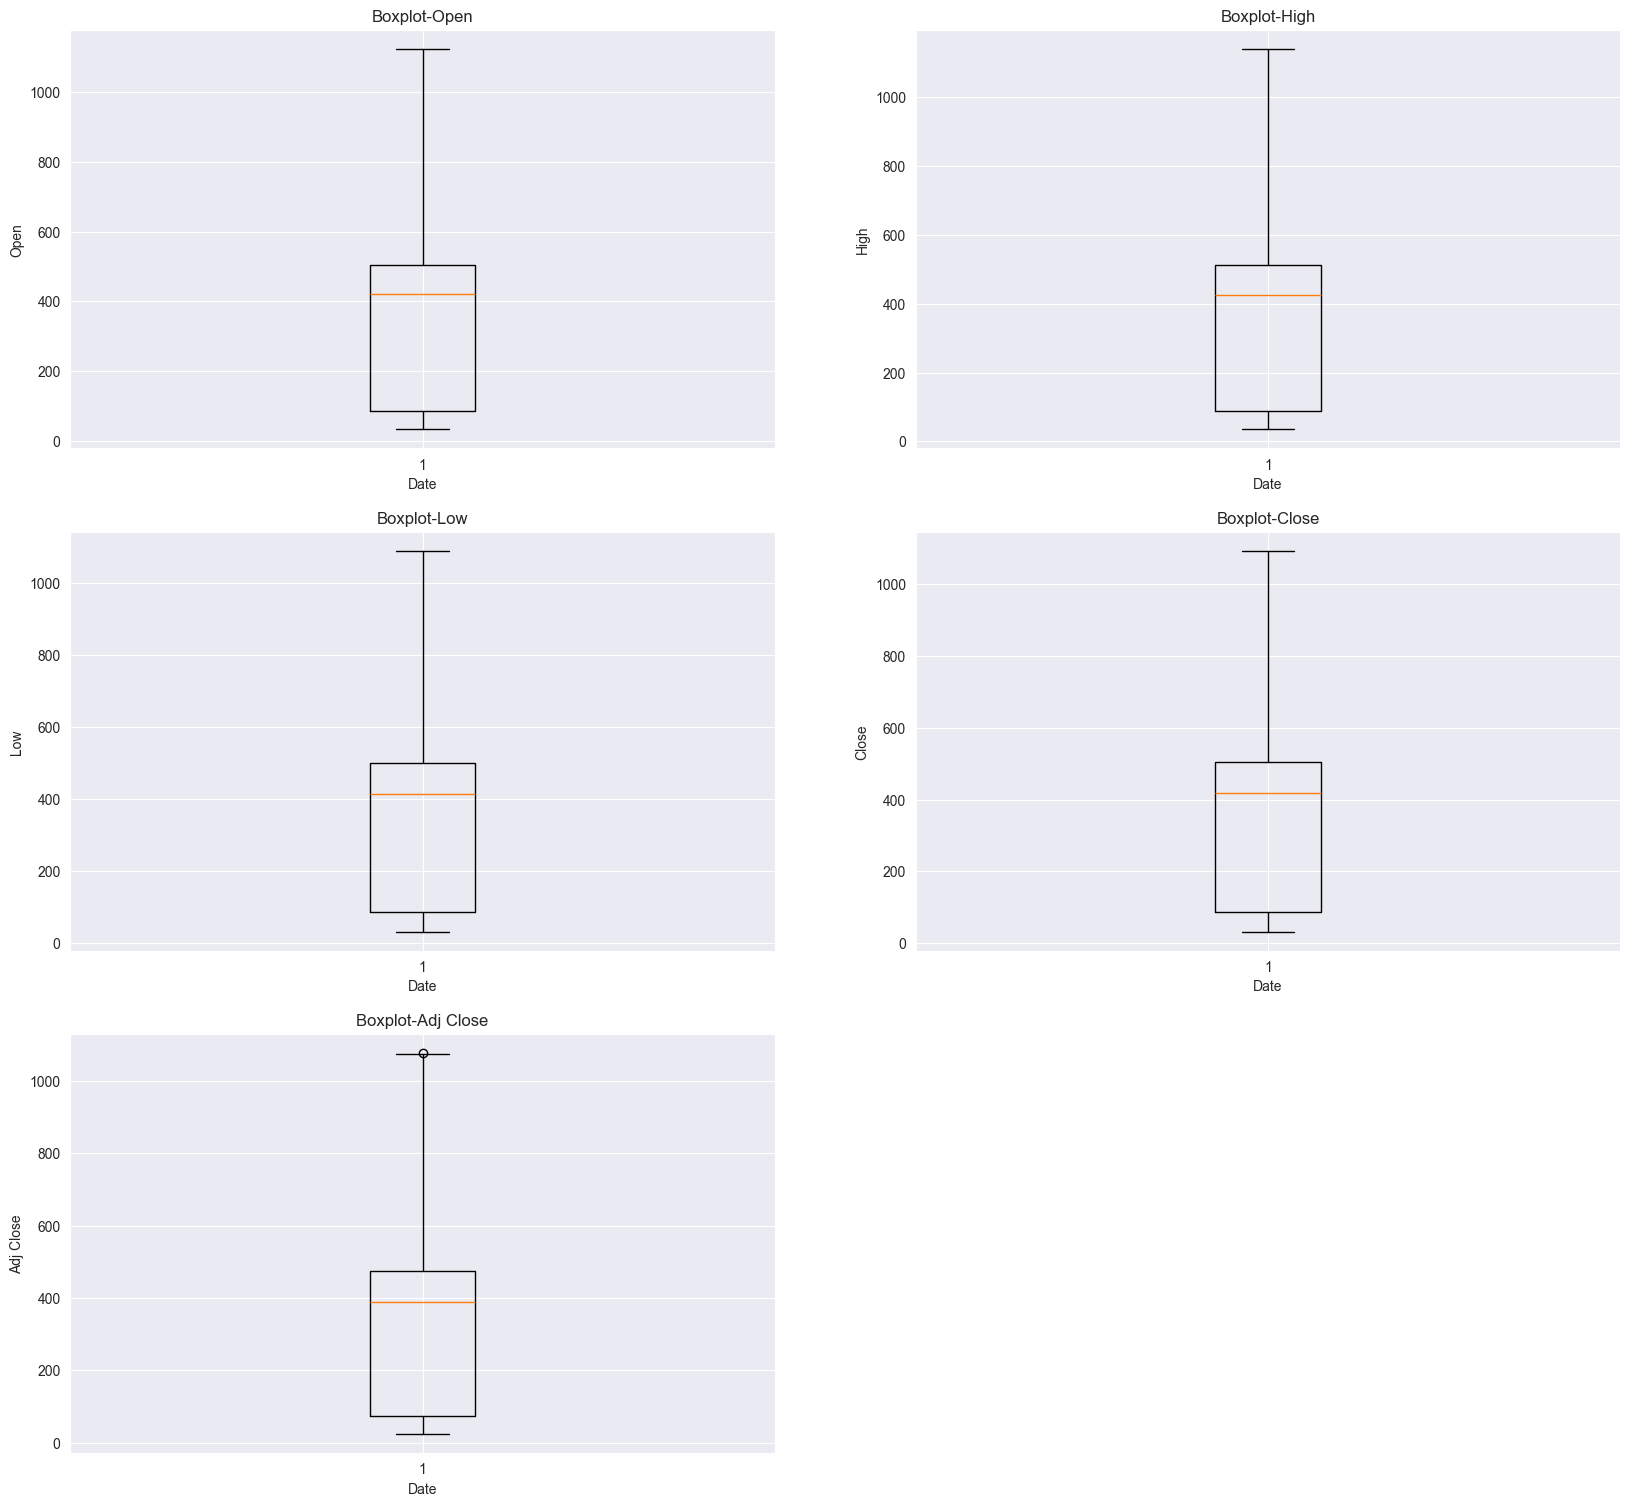

In [167]:
#Boxplot after capping the outliers
#creating boxplots
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.boxplot(df_new['Open'])
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
plt.boxplot(df_new['High'])
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
plt.boxplot(df_new['Low'])
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
plt.boxplot(df_new['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
plt.boxplot(df_new['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")


### Distribution plots after capping outliers

Text(0.5, 1.0, 'Boxplot-Adj Close')

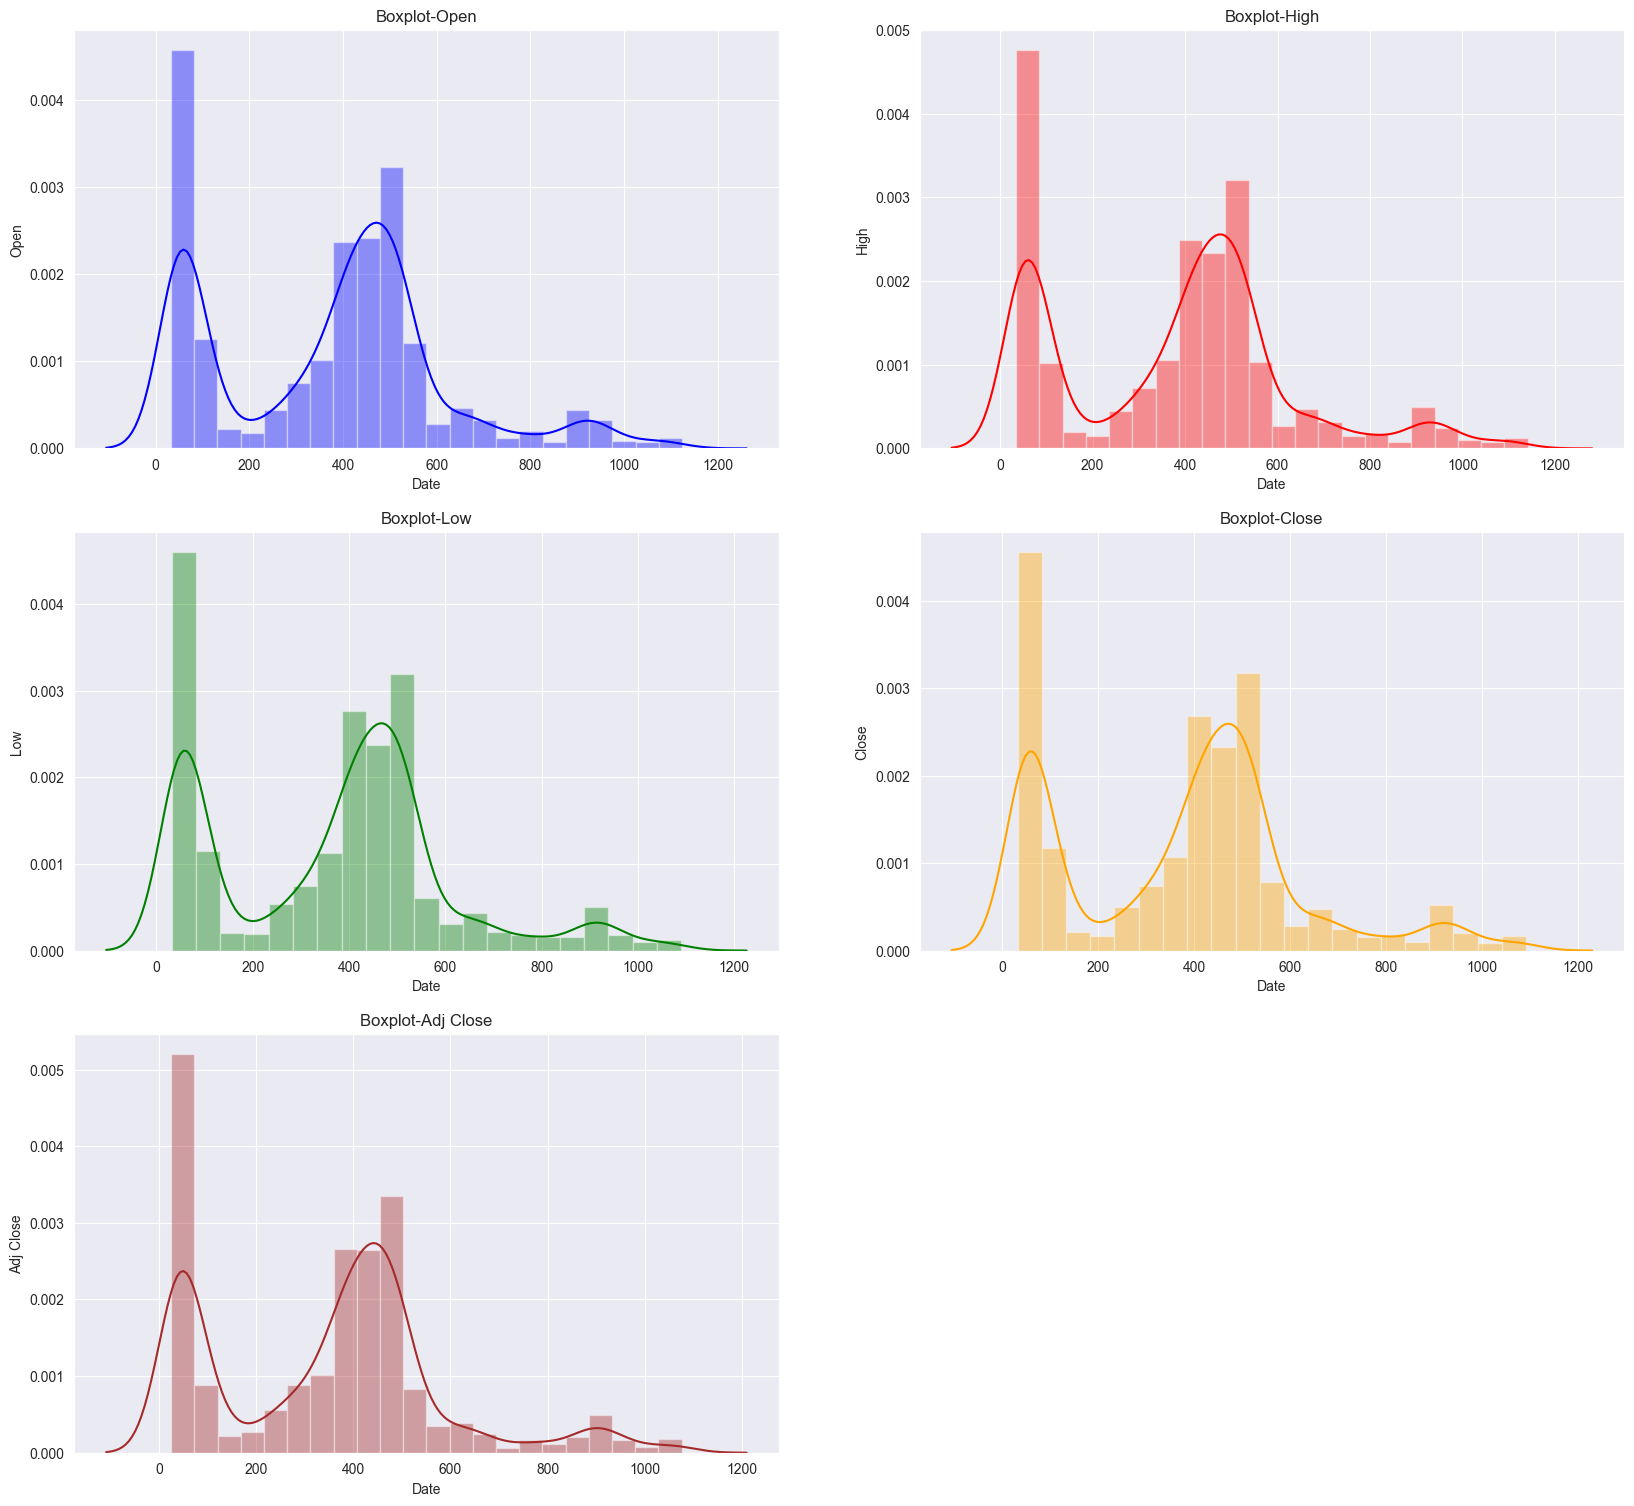

In [168]:
#creating Distribution Plot after capping outliers
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.distplot(df_new['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
sns.distplot(df_new['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
sns.distplot(df_new['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
sns.distplot(df_new['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
sns.distplot(df_new['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

### KDE plot for each column

Text(0.5, 1.0, 'Boxplot-Adj Close')

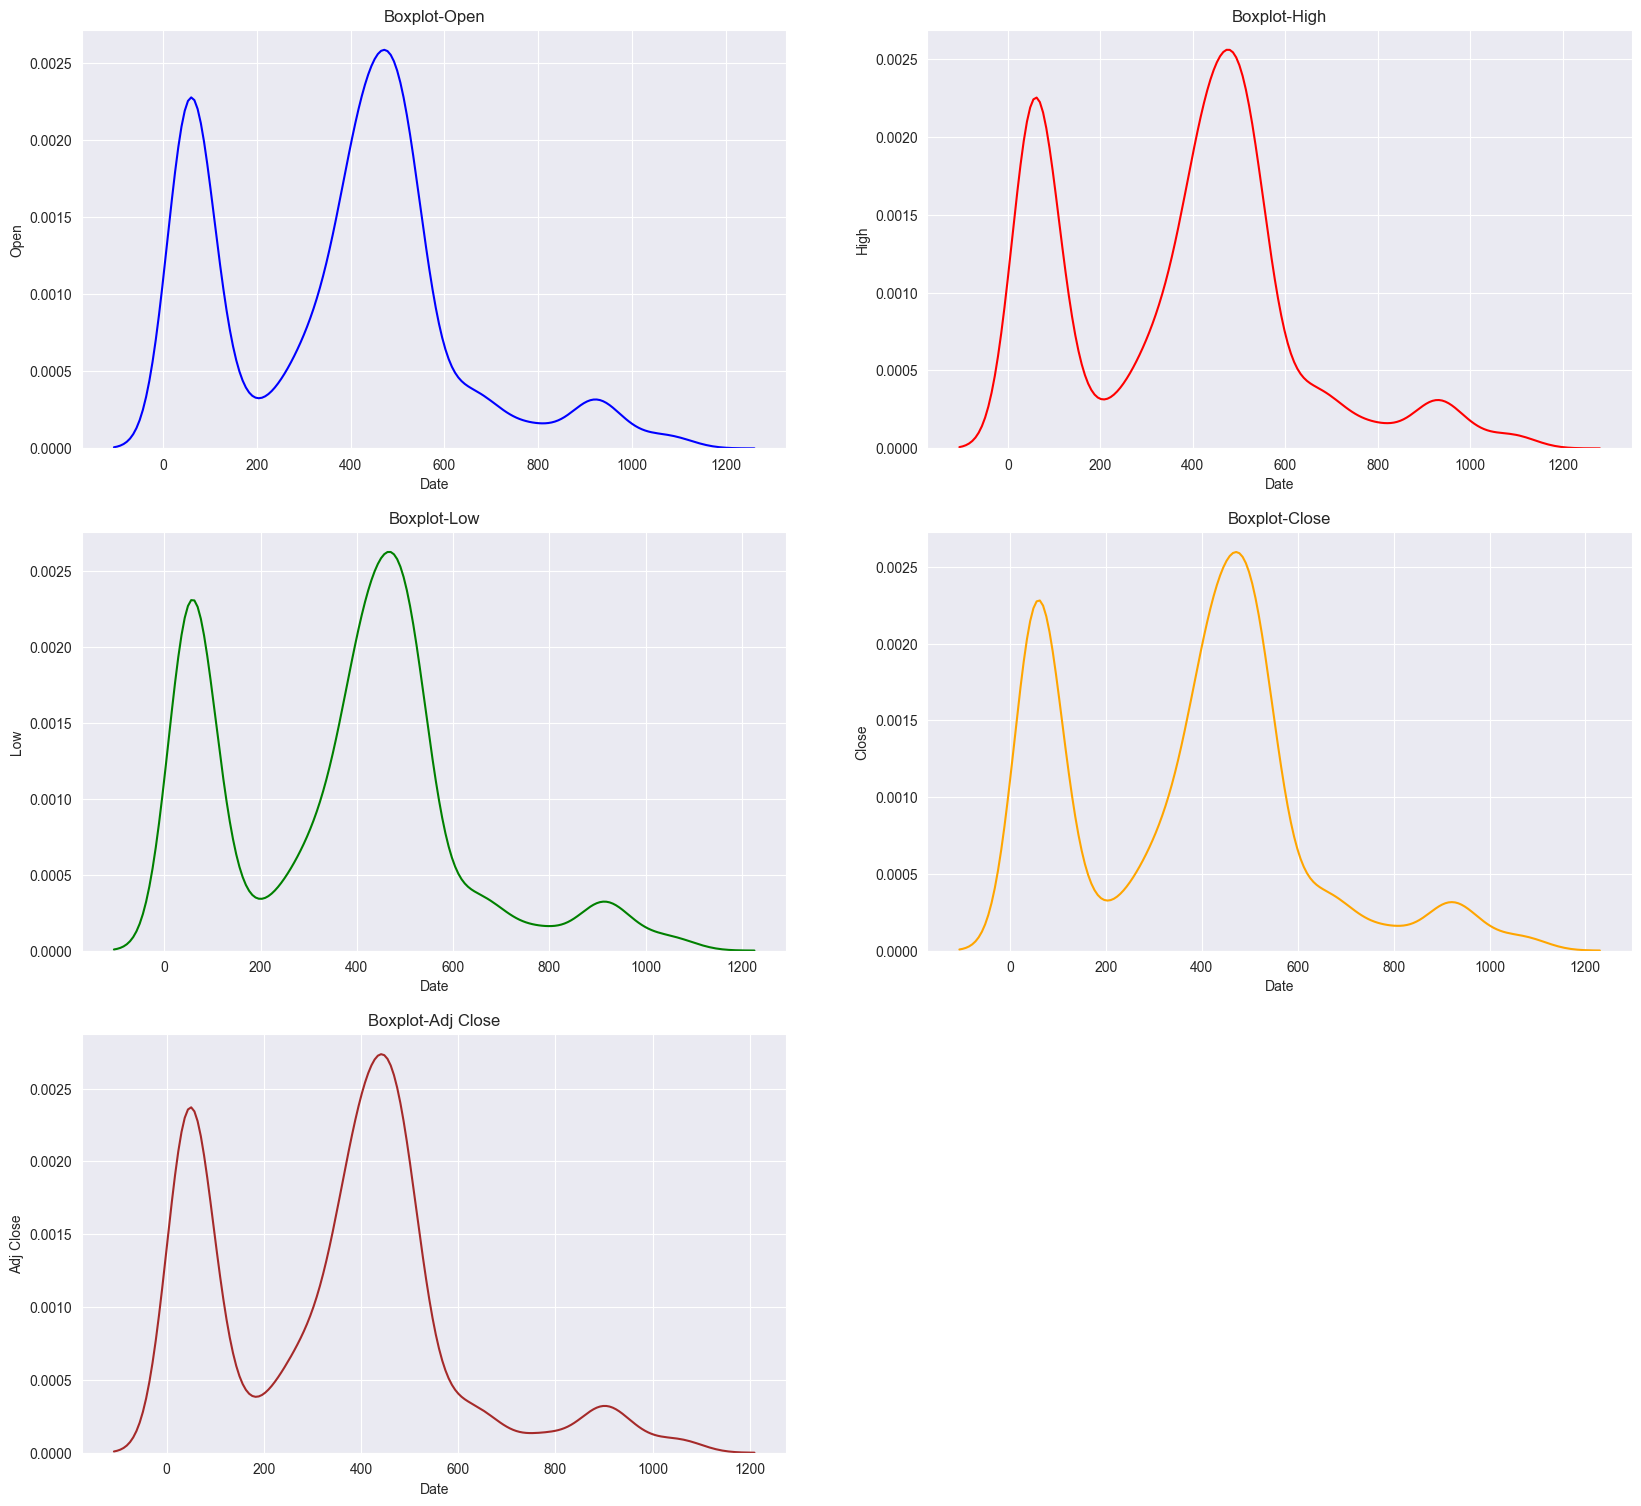

In [169]:
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.kdeplot(df_new['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
sns.kdeplot(df_new['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
sns.kdeplot(df_new['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
sns.kdeplot(df_new['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
sns.kdeplot(df_new['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

In [170]:
#volume column 

In [171]:
print("Volumes max before :",df['Volume'].max())
print("Volumes max before:",df['Volume'].min())
print("Volumes mean before: ", df['Volume'].mean().round(2))

Volumes max before : 291801549.0
Volumes max before: 0.0
Volumes mean before:  16816915.6


In [172]:
print("Volumes max after:",df_new['Volume'].max())
print("Volumes max after:",df_new['Volume'].min())
print("Volumes mean after: ", df_new['Volume'].mean().round(2))

Volumes max after: 49353042.0
Volumes max after: 0.0
Volumes mean after:  14726580.46


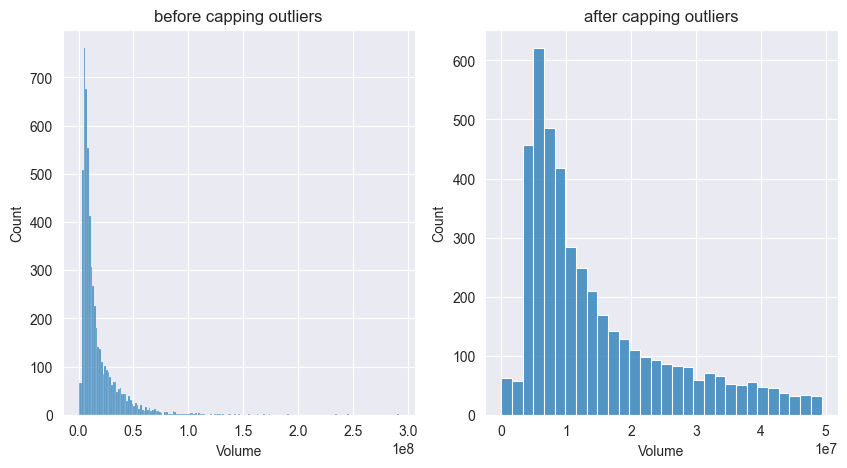

In [173]:
#before capping outliers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Volume'])
plt.title('before capping outliers')
plt.subplot(1,2,2)
sns.histplot(df_new['Volume'])
plt.title('after capping outliers')
plt.show()

In [174]:
#Date vs volume

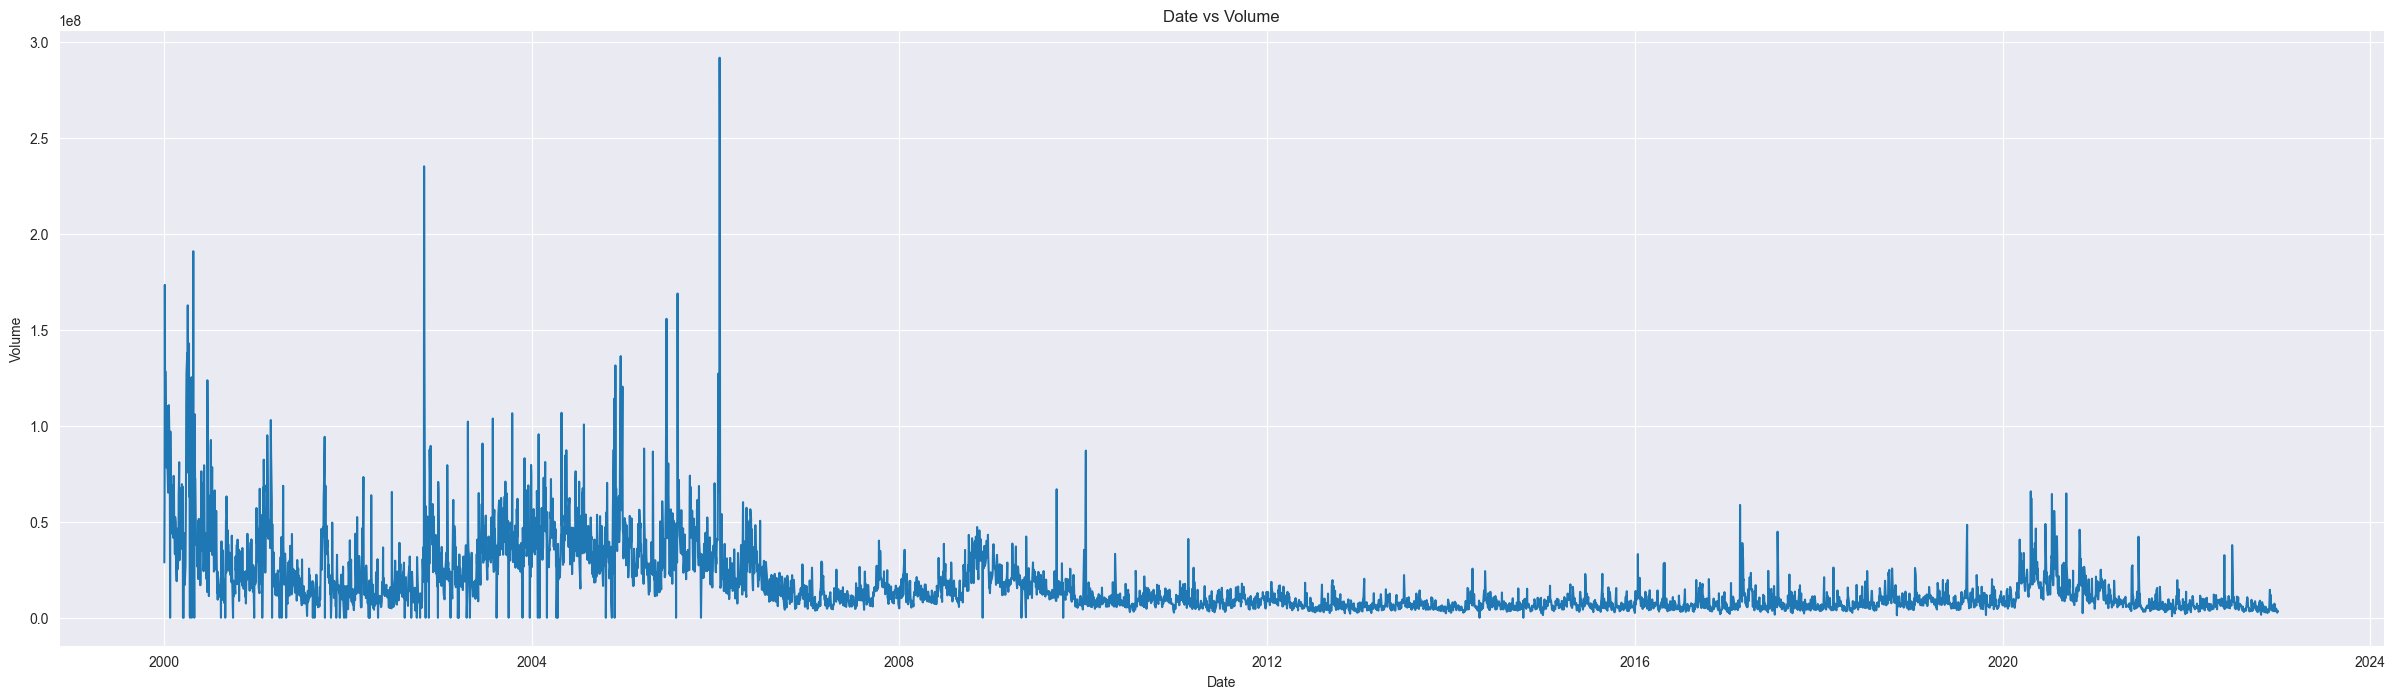

In [175]:
figure=plt.figure(figsize=(30,8))
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

### MonthWise Stock Price of Volume (max)

In [176]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))['Volume'].max()
monthwise_df = pd.DataFrame(monthwise)
monthwise_df

,Volume
Date,
April,190967027.0
August,168920249.0
December,136329286.0
February,95050871.0
January,291801549.0
July,103787779.0
June,155761813.0
March,127348768.0
May,106153132.0


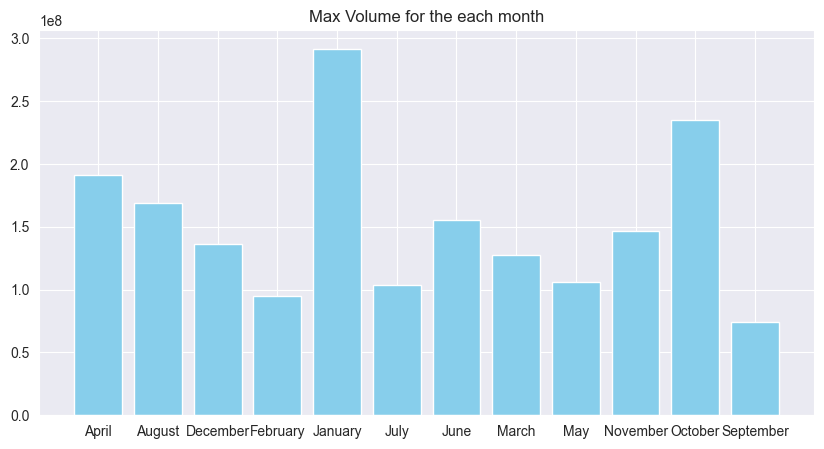

In [177]:
plt.figure(figsize=(10,5))
plt.bar(x=monthwise_df.index,height=monthwise_df['Volume'],color='skyblue')
plt.title('Max Volume for the each month')
plt.show()

# Finding long-term and short-term trends
### Moving Average

In [178]:
#finding the moving average for 30 days and 100 days
df_MA=df_new.copy()
df_MA['30-day MA']=df_new['Close'].rolling(window=30).mean()
df_MA['100-day MA']=df_new['Close'].rolling(window=100).mean()

In [179]:
df_MA.tail(3)

,Open,High,Low,Close,Adj Close,Volume,30-day MA,100-day MA
Date,,,,,,,,
2020-03-30,1030.828735,1064.707642,1010.422180,1020.774109,1010.651794,13951078.0,1047.291060,1005.032301
2020-04-01,1111.712036,1114.040039,1035.385620,1070.304565,1059.691162,19197220.0,1048.090153,1006.192800
2020-04-03,1123.797485,1123.797485,1046.381348,1067.332764,1056.748779,19091236.0,1048.174357,1007.230464


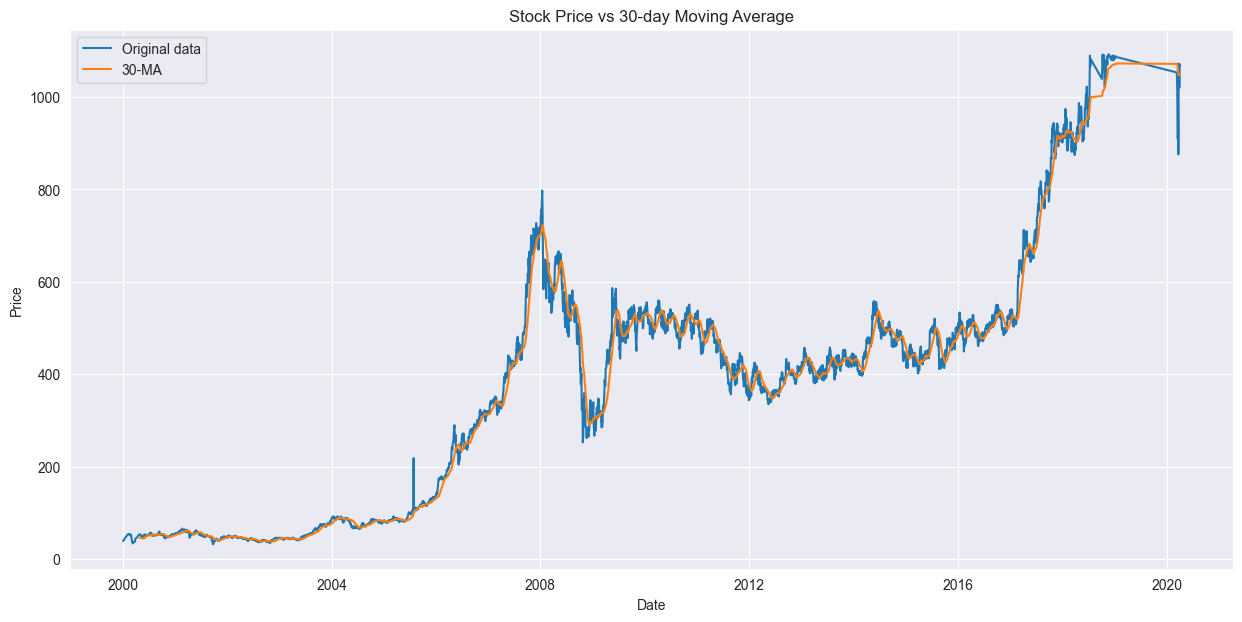

In [180]:
plt.figure(figsize=(15,7))
plt.plot(df_MA['Close'],label='Original data')
plt.plot(df_MA['30-day MA'],label='30-MA')
plt.legend(loc='best')
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

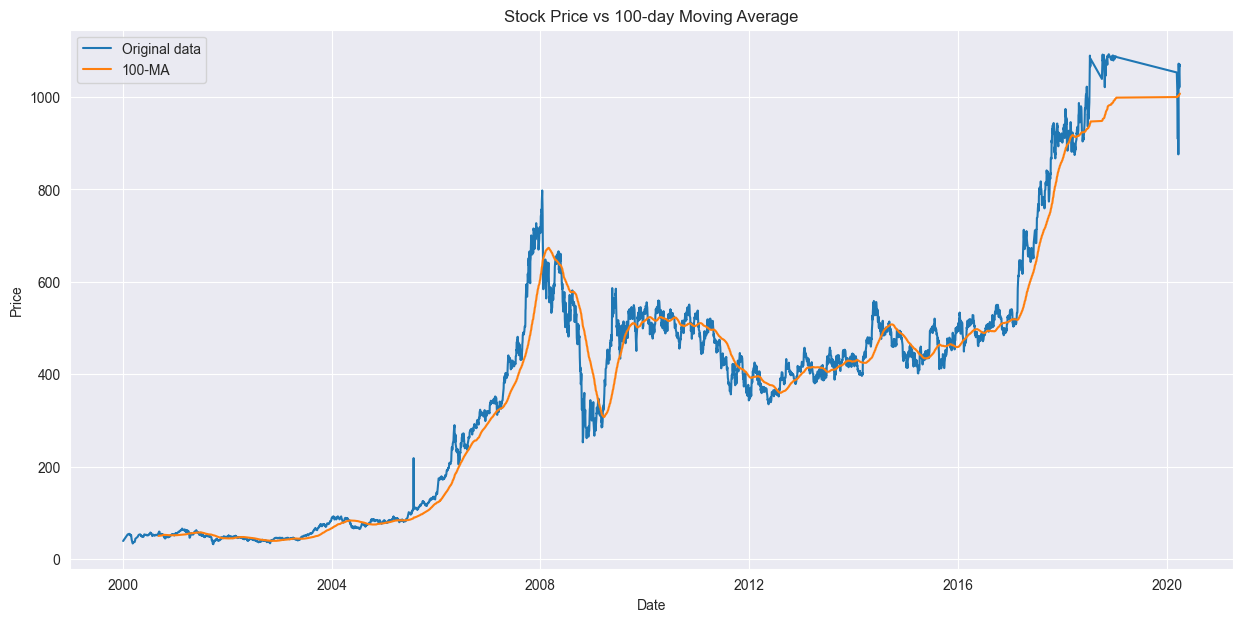

In [181]:
plt.figure(figsize=(15,7))
plt.plot(df_MA['Close'],label='Original data')
plt.plot(df_MA['100-day MA'],label='100-MA')
plt.legend(loc='best')
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Moving Average of 30 and 100 days for the original Dataset 

In [182]:
df_MA1=df.copy()
df_MA1['30-day MA']=df['Close'].rolling(window=30).mean()
df_MA1['100-day MA']=df['Close'].rolling(window=100).mean()

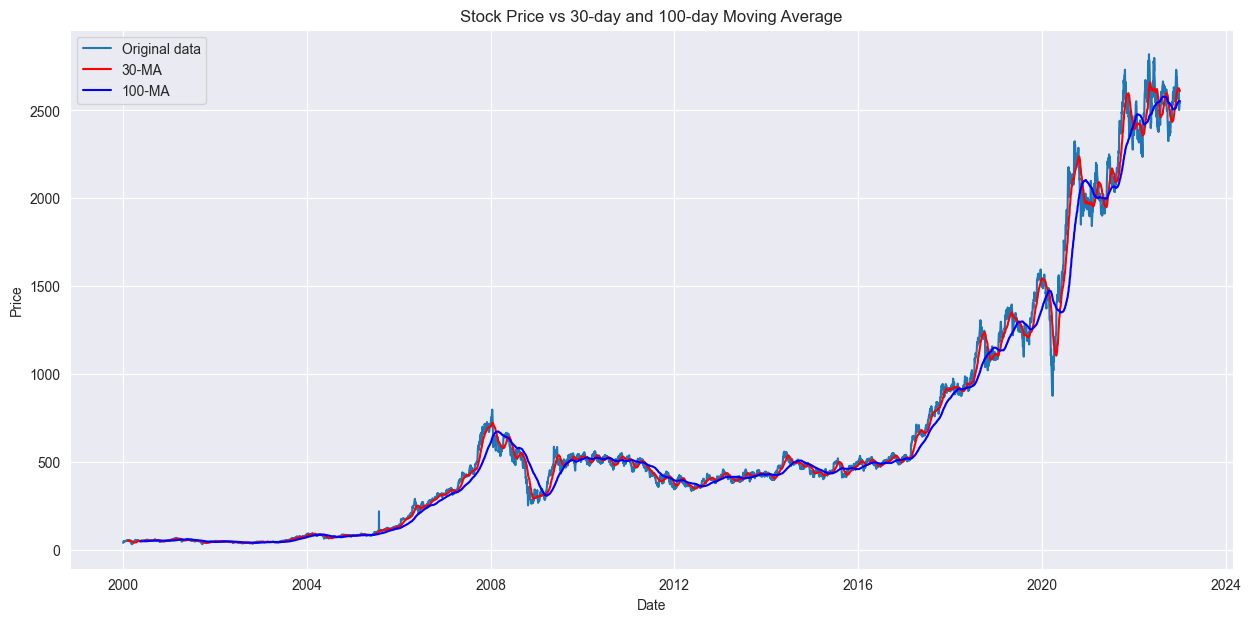

In [183]:
plt.figure(figsize=(15,7))
plt.plot(df_MA1['Close'],label='Original data')
plt.plot(df_MA1['30-day MA'],label='30-MA',color='red')
plt.plot(df_MA1['100-day MA'],label='100-MA',color='blue')
plt.legend(loc='best')
plt.title('Stock Price vs 30-day and 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Correlation

In [184]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999870,0.999861,0.999731,0.999499,-0.323025
High,0.999870,1.000000,0.999825,0.999892,0.999633,-0.321129
Low,0.999861,0.999825,1.000000,0.999883,0.999691,-0.324540
Close,0.999731,0.999892,0.999883,1.000000,0.999772,-0.322671
Adj Close,0.999499,0.999633,0.999691,0.999772,1.000000,-0.317065
Volume,-0.323025,-0.321129,-0.324540,-0.322671,-0.317065,1.000000


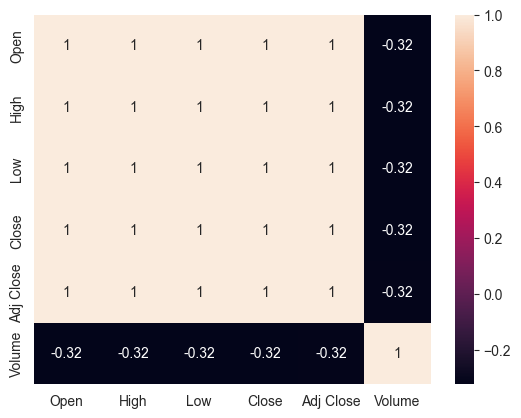

In [185]:
#using heatmap to visualize the correlation
sns.heatmap(df.corr(),annot=True,cbar='YlGnBu')
plt.show()

# Model Building

In [186]:
#lets only the date and Close as the target columns with new dataframe as df1
df1 = pd.DataFrame(df['Close'])
df1

,Close
Date,
2000-01-03,38.944569
2000-01-04,42.062302
2000-01-05,43.710136
2000-01-06,45.543640
2000-01-07,48.669109
...,...
2022-12-26,2524.050049
2022-12-27,2544.699951
2022-12-28,2544.449951


In [187]:
df1 = df1.reset_index()

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
#Scale the data with MinMaxscaler
close_stock = df1.copy
del df1['Date']
minmax = MinMaxScaler(feature_range=(0,1))
df_scaled = minmax.fit_transform(np.array(df1).reshape(-1,1))
print(df_scaled.shape)

(5745, 1)


In [190]:
#split the data for training and testing as 85:15 ratio
train_size = int(len(df_scaled)*0.85)
test_size = int(len(df_scaled))-train_size
print("training size =",train_size)
print("testing size =",test_size)
train_data,test_data = df_scaled[0:train_size,:],df_scaled[train_size:len(df_scaled),:1]
print("Training shape:",train_data.shape)
print("testing shape:",test_data.shape)

training size = 4883
testing size = 862
Training shape: (4883, 1)
testing shape: (862, 1)


In [191]:
#convert a dataset according to the requirements of timeseries data
#creating a function which will take the array with timesteps=1 to default
def createseries_dataset(dataset, time_step=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [192]:
timestep = 2
x_train,y_train = createseries_dataset(train_data,timestep)
x_test,y_test = createseries_dataset(test_data,timestep)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4880, 2)
(4880,)
(859, 2)
(859,)


In [193]:
train_data.shape

(4883, 1)

Now we have perfect shape of data that can be trained by the models 

## Models

### Decision Tree

In [194]:
#import the decision tree
#compile and fit the model
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=3)
DTreeReg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [195]:
#prediction

train_predict = DTreeReg.predict(x_train)
test_predict = DTreeReg.predict(x_test)

#reshape the data 
trainpredict = train_predict.reshape(-1,1)
testpredict= test_predict.reshape(-1,1)


print("train data shape :",trainpredict.shape)
print("test data shape :",testpredict.shape)

train data shape : (4880, 1)
test data shape : (859, 1)


In [196]:
# Transform back to original form

train_predict = minmax.inverse_transform(trainpredict)
test_predict = minmax.inverse_transform(testpredict)
original_ytrain = minmax.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = minmax.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrics

will evaluate the model with MSE,MAE,RMSE

In [197]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import math

In [198]:
print("SVRegressor training MAE =",mean_absolute_error(original_ytrain,train_predict))
print("SVRegressor training MSE =",mean_squared_error(original_ytrain,train_predict))
print("SVRegressor training RMSE =",math.sqrt(root_mean_squared_error(original_ytrain,train_predict)))
print("-------------------------------------------------------------------------------")
print("SVRegressor testing MAE =",mean_absolute_error(original_ytest,test_predict))
print("SVRegressor testing MSE =",mean_squared_error(original_ytest,test_predict))
print("SVRegressor testing RMSE =",math.sqrt(root_mean_squared_error(original_ytest,test_predict)))

SVRegressor training MAE = 33.99579024579137
SVRegressor training MSE = 2156.4136590273583
SVRegressor training RMSE = 6.8144846643197265
-------------------------------------------------------------------------------
SVRegressor testing MAE = 842.1659484256148
SVRegressor testing MSE = 918732.4414623103
SVRegressor testing RMSE = 30.95973701996442


### R2 Score

In [199]:
#import R2score 
from sklearn.metrics import r2_score,accuracy_score

In [200]:
train_r2_score_svr = r2_score(original_ytrain,train_predict)
test_r2_score_svr = r2_score(original_ytest,test_predict)
print("R2 Score of Train in SVR :",train_r2_score_svr)
print("R2 Score of Test in SVR :",test_r2_score_svr)

R2 Score of Train in SVR : 0.9759674915191295
R2 Score of Test in SVR : -3.081710509754175


In [201]:
#lets compare Original,trainpredict and test predict

look_back=timestep
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
print("Test predicted data: ", trainPredictPlot.shape)

#names = (['Origianl close price','Train predicted close price','Test predicted Close price'])

Train predicted data:  (5745, 1)
Test predicted data:  (5745, 1)


In [202]:
testPredictPlot.shape

(5745, 1)

In [203]:
plotdf = pd.DataFrame({'Date': df1.index, 'original_close': df1['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

<Axes: xlabel='Date', ylabel='test_predicted_close'>

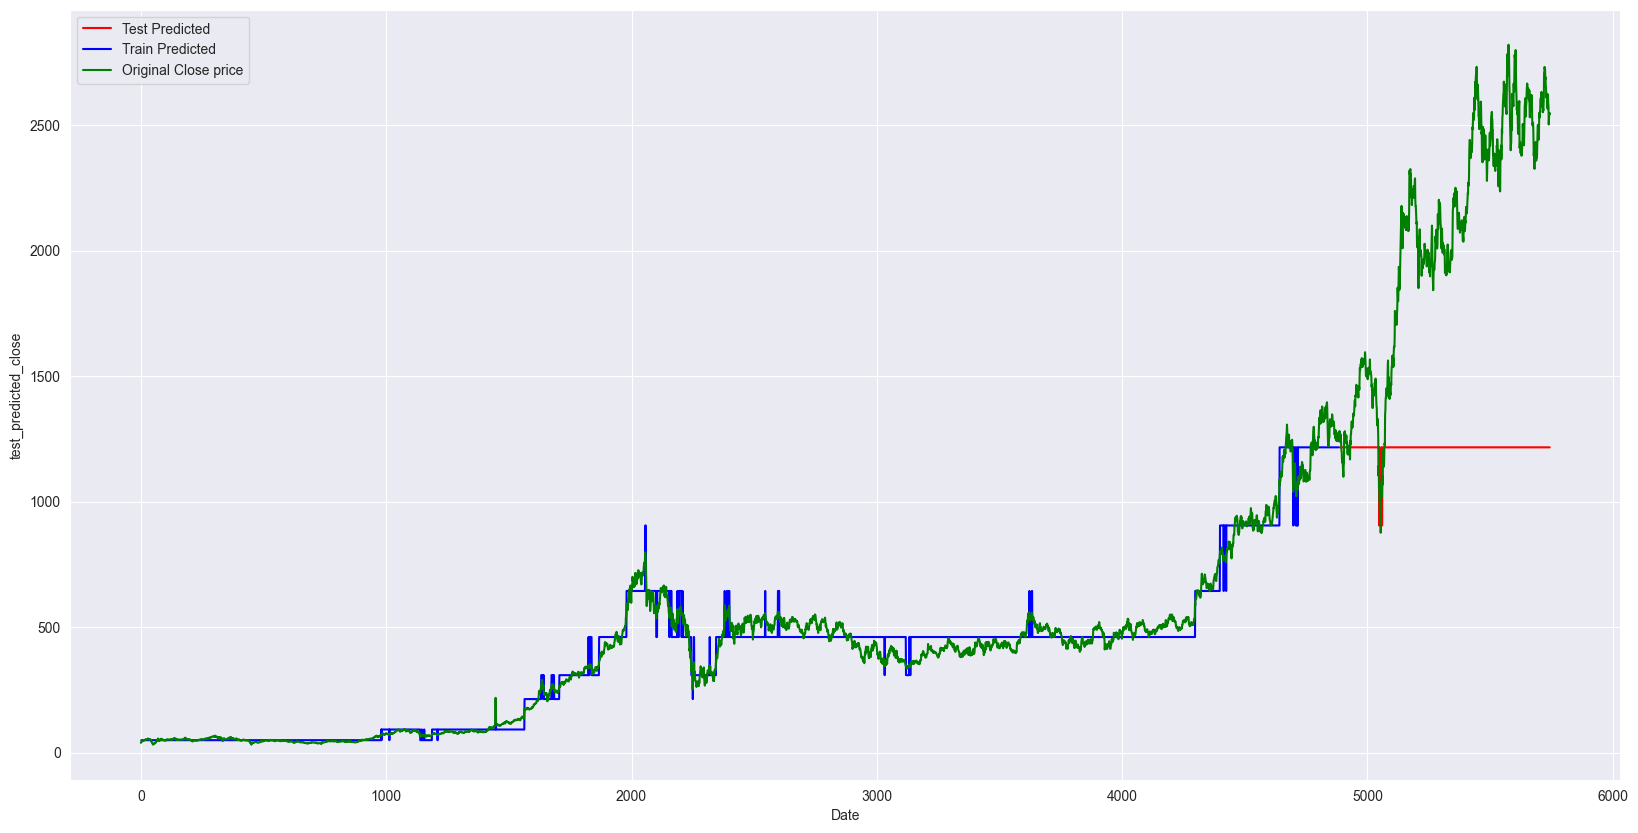

In [204]:
plt.figure(figsize=(20,10))
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['test_predicted_close'],label='Test Predicted',color='red')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['train_predicted_close'],label='Train Predicted',color='blue')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['original_close'],label='Original Close price',color='green')

## Plotting next 30 days

In [205]:
x_input=test_data[len(test_data)-timestep:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=timestep
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>timestep):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = DTreeReg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = DTreeReg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


## Plotting last 15 days and next 30 days

In [206]:
last_days=np.arange(1,timestep+1)
day_pred=np.arange(timestep+1,timestep+pred_days+1)
print(last_days)
print(day_pred)

[1 2]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


In [207]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:timestep+1] = minmax.inverse_transform(df_scaled[len(df1)-timestep:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[timestep+1:] = minmax.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})


<Axes: xlabel='None', ylabel='last_original_days_value'>

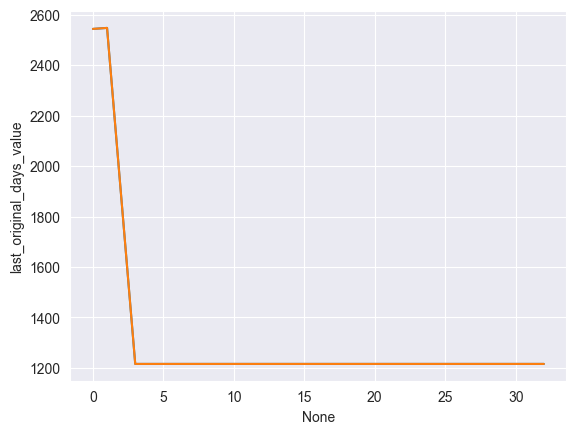

In [208]:
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['last_original_days_value'])
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['next_predicted_days_value'])

### SVR

In [209]:
#import the model and fit
from sklearn.svm import SVR
SVReg = SVR(gamma=0.01,kernel='rbf',C=1000)
SVReg.fit(x_train,y_train)

SVR(C=1000, gamma=0.01)

In [210]:
#prediction

trainpredict = SVReg.predict(x_train)
testpredict = SVReg.predict(x_test)

#reshape the data 
trainpredict = trainpredict.reshape(-1,1)
testpredict= testpredict.reshape(-1,1)


print("train data shape :",trainpredict.shape)
print("test data shape :",testpredict.shape)

train data shape : (4880, 1)
test data shape : (859, 1)


In [211]:
# Transform back to original form

train_predict = minmax.inverse_transform(trainpredict)
test_predict = minmax.inverse_transform(testpredict)
original_ytrain = minmax.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = minmax.inverse_transform(y_test.reshape(-1,1)) 

## Evaluation Metrics MSE,MAE,RMSE

In [212]:
print("SVRegressor training MAE =",mean_absolute_error(original_ytrain,train_predict))
print("SVRegressor training MSE =",mean_squared_error(original_ytrain,train_predict))
print("SVRegressor training RMSE =",math.sqrt(root_mean_squared_error(original_ytrain,train_predict)))
print("-------------------------------------------------------------------------------")
print("SVRegressor testing MAE =",mean_absolute_error(original_ytest,test_predict))
print("SVRegressor testing MSE =",mean_squared_error(original_ytest,test_predict))
print("SVRegressor testing RMSE =",math.sqrt(root_mean_squared_error(original_ytest,test_predict)))

SVRegressor training MAE = 160.77213292841614
SVRegressor training MSE = 32401.818471508126
SVRegressor training RMSE = 13.416596112236133
-------------------------------------------------------------------------------
SVRegressor testing MAE = 524.7171434885179
SVRegressor testing MSE = 312663.49216157553
SVRegressor testing RMSE = 23.64663204535839


### R2 Score

In [213]:
train_r2_score_svr = r2_score(original_ytrain,train_predict)
test_r2_score_svr = r2_score(original_ytest,test_predict)
print("R2 Score of Train in SVR :",train_r2_score_svr)
print("R2 Score of Test in SVR :",test_r2_score_svr)

R2 Score of Train in SVR : 0.6388925779836827
R2 Score of Test in SVR : -0.3890897984848174


### GridSearchCV

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
params ={'gamma':[0.01,0.02,0.03],'kernel':['rbf','sigmoid','poly'],'C':[1000.0,2000.0,3000.0]}

In [250]:
gridsearch = GridSearchCV(param_grid=params,estimator=SVReg)

In [251]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVR(C=1000, gamma=0.01),
             param_grid={'C': [1000.0, 2000.0, 3000.0],
                         'gamma': [0.01, 0.02, 0.03],
                         'kernel': ['rbf', 'sigmoid', 'poly']})

In [252]:
gridsearch.best_params_

{'C': 1000.0, 'gamma': 0.03, 'kernel': 'sigmoid'}

Vis

In [219]:
#lets compare Original,trainpredict and test predict

look_back=timestep
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test
look_back=timestep
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
print("Test predicted data: ", trainPredictPlot.shape)


Train predicted data:  (5745, 1)
Test predicted data:  (5745, 1)


In [220]:
plotdf = pd.DataFrame({'Date': df1.index, 'original_close': df1['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

<Axes: xlabel='Date', ylabel='test_predicted_close'>

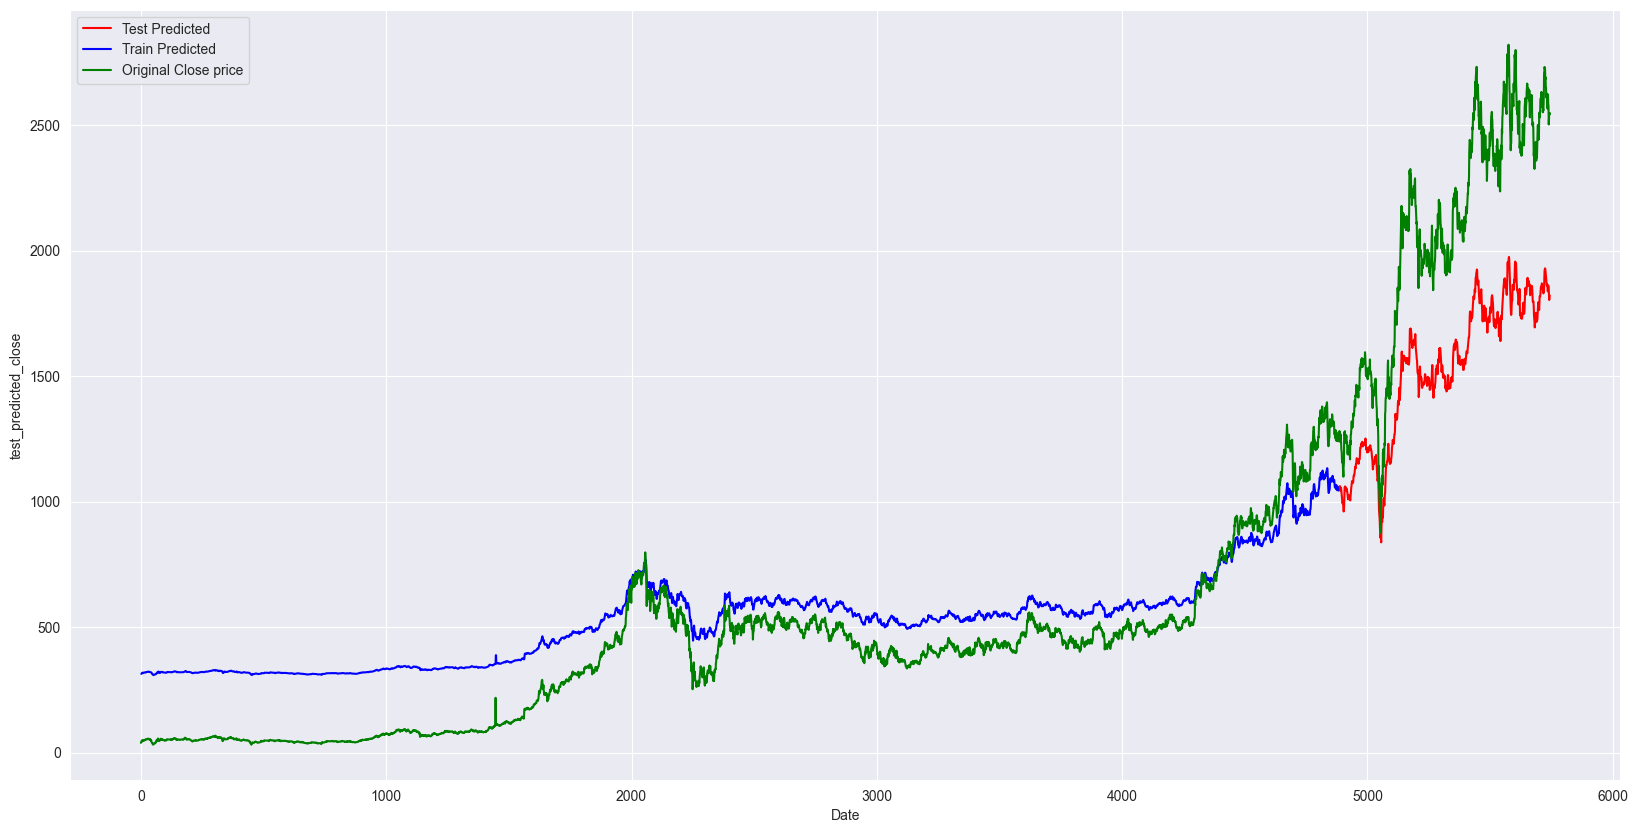

In [221]:
plt.figure(figsize=(20,10))
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['test_predicted_close'],label='Test Predicted',color='red')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['train_predicted_close'],label='Train Predicted',color='blue')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['original_close'],label='Original Close price',color='green')

## Predicting next 30 days

In [222]:
x_input=test_data[len(test_data)-timestep:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=timestep
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>timestep):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = DTreeReg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = DTreeReg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### plotting last 15 days and next predicted 30 days

In [223]:
last_days=np.arange(1,timestep+1)
day_pred=np.arange(timestep+1,timestep+pred_days+1)
print(last_days)
print(day_pred)

[1 2]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


In [224]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:timestep+1] = minmax.inverse_transform(df_scaled[len(df1)-timestep:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[timestep+1:] = minmax.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})


<Axes: xlabel='None', ylabel='last_original_days_value'>

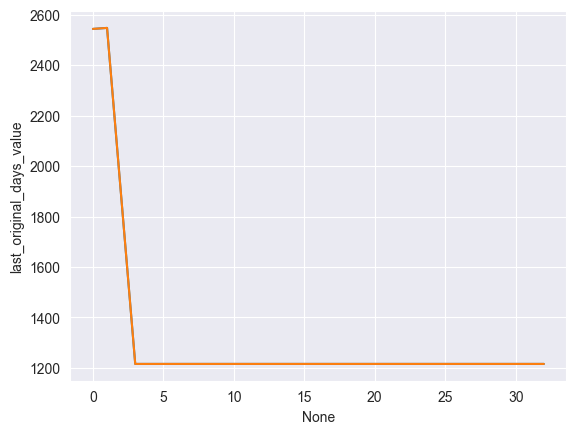

In [225]:
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['last_original_days_value'])
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['next_predicted_days_value'])

### Random Forest Regressor - RF

In [226]:
from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor(n_estimators=5,random_state=50)
randomf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=50)

In [227]:
#prediction

trainpredict = randomf.predict(x_train)
testpredict = randomf.predict(x_test)

#reshape the data 
trainpredict = trainpredict.reshape(-1,1)
testpredict= testpredict.reshape(-1,1)


print("train data shape :",trainpredict.shape)
print("test data shape :",testpredict.shape)

train data shape : (4880, 1)
test data shape : (859, 1)


In [228]:
# Transform back to original form

train_predict = minmax.inverse_transform(trainpredict)
test_predict = minmax.inverse_transform(testpredict)
original_ytrain = minmax.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = minmax.inverse_transform(y_test.reshape(-1,1)) 

## Evaluation Metrics MSE,MAE,RMSE

In [229]:
print("RandomForestregressor training MAE =",mean_absolute_error(original_ytrain,train_predict))
print("Randomforestregressor training MSE =",mean_squared_error(original_ytrain,train_predict))
print("RandomForestregressor training RMSE =",math.sqrt(root_mean_squared_error(original_ytrain,train_predict)))
print("-------------------------------------------------------------------------------")
print("RandomForestregressor testing MAE =",mean_absolute_error(original_ytest,test_predict))
print("RandomForestregressor testing MSE =",mean_squared_error(original_ytest,test_predict))
print("RandomForestregressor testing RMSE =",math.sqrt(root_mean_squared_error(original_ytest,test_predict)))

RandomForestregressor training MAE = 2.754868782527324
Randomforestregressor training MSE = 24.735365187685485
RandomForestregressor training RMSE = 2.2301269277909346
-------------------------------------------------------------------------------
RandomForestregressor testing MAE = 700.0091746970897
RandomForestregressor testing MSE = 679559.486492303
RandomForestregressor testing RMSE = 28.711565288300324


### R2 Score

In [230]:
train_r2_score_RFr = r2_score(original_ytrain,train_predict)
test_r2_score_RFr = r2_score(original_ytest,test_predict)
print("R2 Score of Train in RFr :",train_r2_score_svr)
print("R2 Score of Test in Rfr :",test_r2_score_svr)

R2 Score of Train in RFr : 0.6388925779836827
R2 Score of Test in Rfr : -0.3890897984848174


In [231]:
#lets compare Original,trainpredict and test predict

look_back=timestep
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test
look_back=timestep
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
print("Test predicted data: ", trainPredictPlot.shape)

Train predicted data:  (5745, 1)
Test predicted data:  (5745, 1)


In [232]:
plotdf = pd.DataFrame({'Date': df1.index, 'original_close': df1['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

<Axes: xlabel='Date', ylabel='test_predicted_close'>

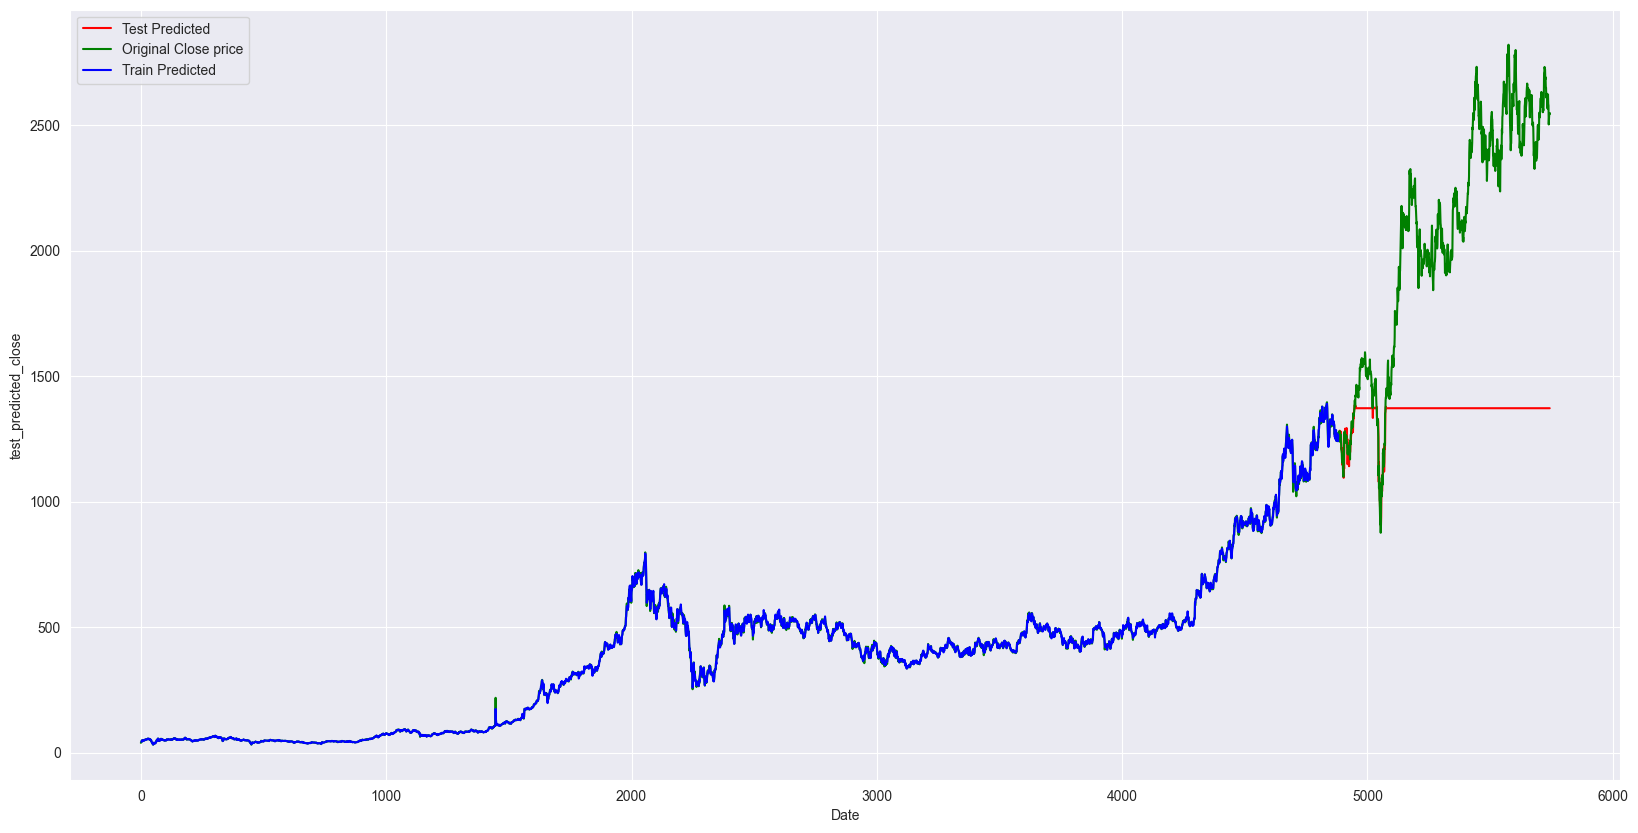

In [255]:
plt.figure(figsize=(20,10))
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['test_predicted_close'],label='Test Predicted',color='red')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['original_close'],label='Original Close price',color='green')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['train_predicted_close'],label='Train Predicted',color='blue')

### Predicting next 30 days

In [234]:
x_input=test_data[len(test_data)-timestep:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=timestep
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>timestep):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = DTreeReg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = DTreeReg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and predicted 30 days

In [235]:
last_days=np.arange(1,timestep+1)
day_pred=np.arange(timestep+1,timestep+pred_days+1)
print(last_days)
print(day_pred)

[1 2]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


In [236]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:timestep+1] = minmax.inverse_transform(df_scaled[len(df1)-timestep:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[timestep+1:] = minmax.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})


<Axes: xlabel='None', ylabel='last_original_days_value'>

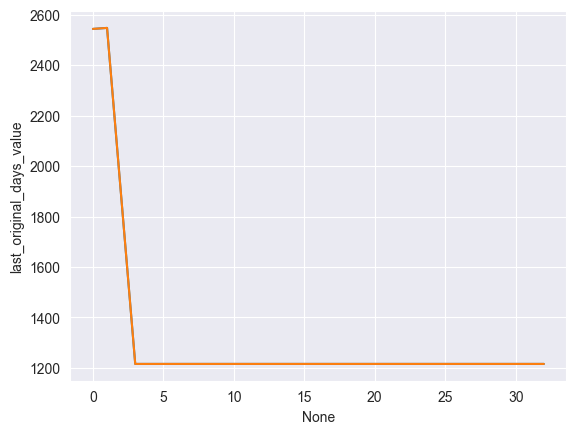

In [237]:
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['last_original_days_value'])
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['next_predicted_days_value'])

## KNN - K Nearest Neighbour

In [238]:
#import the model
from sklearn.neighbors import KNeighborsRegressor

k = timestep
knnreg = KNeighborsRegressor(n_neighbors=k,)
knnreg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [239]:
#prediction

trainpredict = randomf.predict(x_train)
testpredict = randomf.predict(x_test)

#reshape the data 
trainpredict = trainpredict.reshape(-1,1)
testpredict= testpredict.reshape(-1,1)


print("train data shape :",trainpredict.shape)
print("test data shape :",testpredict.shape)

train data shape : (4880, 1)
test data shape : (859, 1)


In [240]:
# Transform back to original form

train_predict = minmax.inverse_transform(trainpredict)
test_predict = minmax.inverse_transform(testpredict)
original_ytrain = minmax.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = minmax.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation Metrics MSE,MAE,RMSE

In [241]:
print("KnnRegressor training MAE =",mean_absolute_error(original_ytrain,train_predict))
print("Knnregressor training MSE =",mean_squared_error(original_ytrain,train_predict))
print("Knnregressor training RMSE =",math.sqrt(root_mean_squared_error(original_ytrain,train_predict)))
print("-------------------------------------------------------------------------------")
print("Knnregressor testing MAE =",mean_absolute_error(original_ytest,test_predict))
print("knnregressor testing MSE =",mean_squared_error(original_ytest,test_predict))
print("knnregressor testing RMSE =",math.sqrt(root_mean_squared_error(original_ytest,test_predict)))

KnnRegressor training MAE = 2.754868782527324
Knnregressor training MSE = 24.735365187685485
Knnregressor training RMSE = 2.2301269277909346
-------------------------------------------------------------------------------
Knnregressor testing MAE = 700.0091746970897
knnregressor testing MSE = 679559.486492303
knnregressor testing RMSE = 28.711565288300324


### R2 Score

In [242]:
train_r2_score_knnr = r2_score(original_ytrain,train_predict)
test_r2_score_knnr = r2_score(original_ytest,test_predict)
print("R2 Score of Train in knnr :",train_r2_score_svr)
print("R2 Score of Test in knnr :",test_r2_score_svr)

R2 Score of Train in knnr : 0.6388925779836827
R2 Score of Test in knnr : -0.3890897984848174


In [243]:
#lets compare Original,trainpredict and test predict

look_back=timestep
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test
look_back=timestep
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
print("Test predicted data: ", trainPredictPlot.shape)

Train predicted data:  (5745, 1)
Test predicted data:  (5745, 1)


In [244]:
plotdf = pd.DataFrame({'Date': df1.index, 'original_close': df1['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

<Axes: xlabel='Date', ylabel='test_predicted_close'>

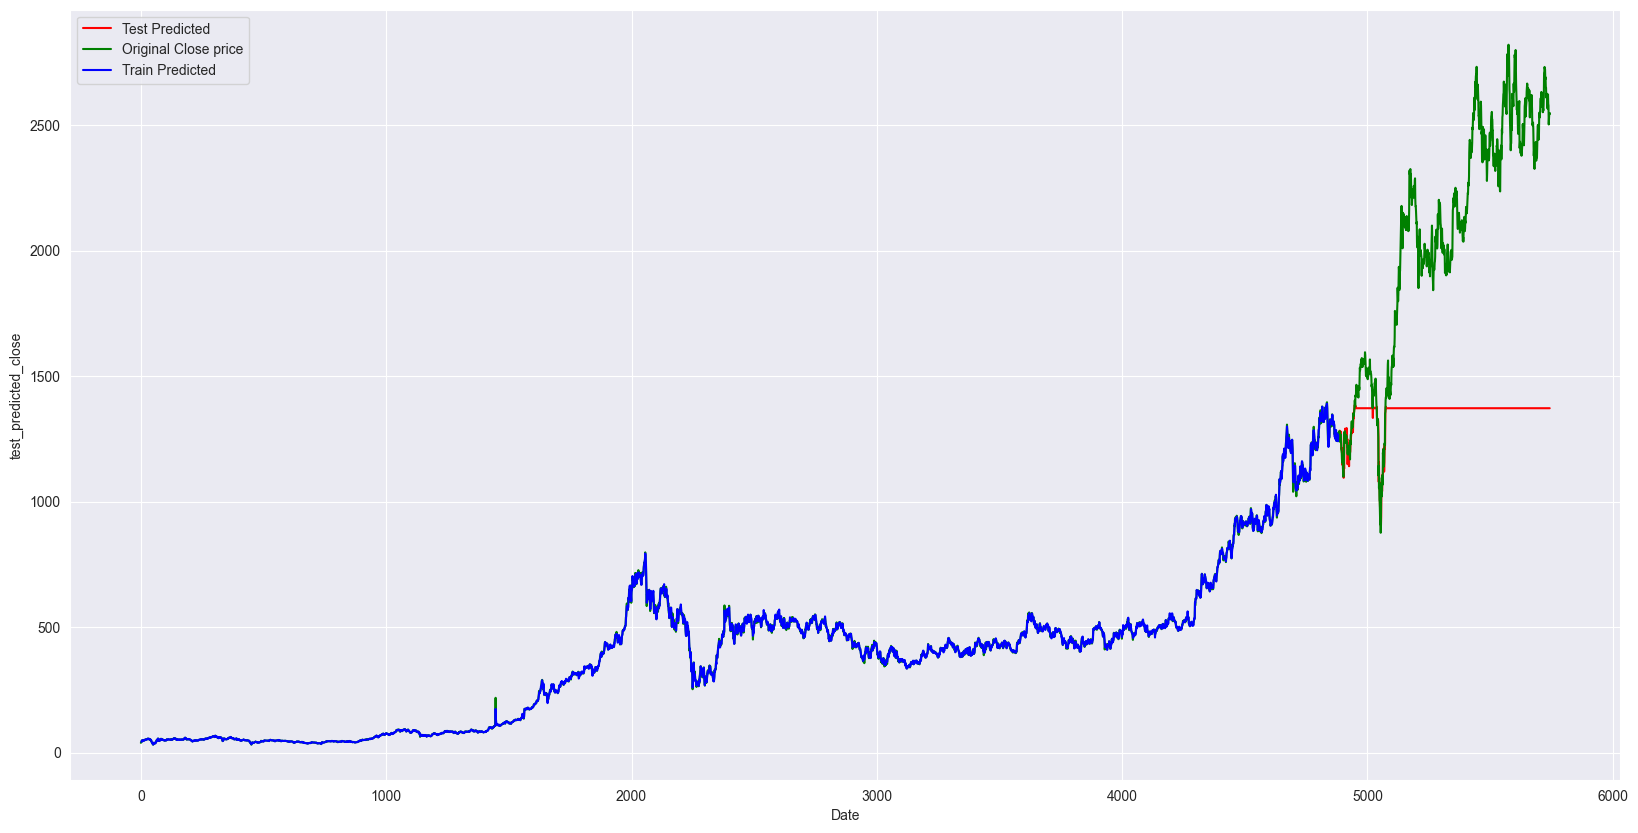

In [258]:
plt.figure(figsize=(20,10))
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['test_predicted_close'],label='Test Predicted',color='red')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['original_close'],label='Original Close price',color='green')
sns.lineplot(plotdf,x=plotdf['Date'],y=plotdf['train_predicted_close'],label='Train Predicted',color='blue')

### Plotting last 15 with predicted next 30 days

In [259]:
last_days=np.arange(1,timestep+1)
day_pred=np.arange(timestep+1,timestep+pred_days+1)
print(last_days)
print(day_pred)

[1 2]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


In [260]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:timestep+1] = minmax.inverse_transform(df_scaled[len(df1)-timestep:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[timestep+1:] = minmax.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})


<Axes: xlabel='None', ylabel='last_original_days_value'>

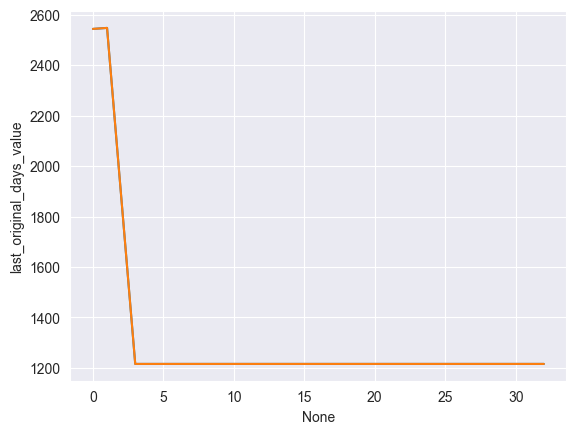

In [261]:
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['last_original_days_value'])
sns.lineplot(new_pred_plot,x=new_pred_plot.index,y=new_pred_plot['next_predicted_days_value'])

## LSTM - Long Short Term Memory --RNN

In [262]:
x_train.shape

(4880, 2)